# Business case and Studies:

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. 

we were predicting the level of damage so that it can be avoided in the future and the features that caused more damage will be taken care most to avoid such damages.

As we have gone through the dat awe have concluded that the features which cause more damage were Location, ground type, floor type, material used and the age of the building.

A government agency or an international aid organization is tasked with efficiently allocating resources for disaster response and recovery efforts in the aftermath of a major earthquake in Nepal.

The Nepal Earthquake Damage Prediction dataset  contains information about various buildings, including their structural characteristics, location, and historical earthquake damage assessment. The dataset provides valuable insights into the vulnerability of buildings to earthquake damage.


They need to prioritize which areas and buildings are at the highest risk of damage to deploy rescue teams, allocate medical supplies, and plan reconstruction efforts effectively.

There are 3 grades of the damage: •1 represents low damage •2 represents a medium amount of damage •3 represents almost complete destruction

# Business objective:

Predict Building Damage: Develop a predictive model that can accurately assess the damage grade of buildings in the event of an earthquake. The damage grade can be categorized as 'low,' 'medium,' or 'high' based on the extent of damage.

Resource Allocation: Use the predictive model to prioritize resource allocation. Identify buildings and areas that are at the highest risk of severe damage. 

This information can help allocate limited resources, such as rescue teams, medical supplies, and construction materials, to the most critical areas.

Emergency Response Planning: Enhance emergency response planning by identifying vulnerable structures in advance. 

This can include identifying evacuation routes, establishing emergency shelters, and ensuring the safety of residents in high-risk areas.

Reconstruction Planning: Plan post-disaster reconstruction efforts by identifying areas where buildings are likely to be severely damaged. This information can guide the construction of safer and more resilient buildings in the affected regions.

# Proposed Solution:

Develop a machine learning model using the Nepal Earthquake Damage Prediction dataset to predict the damage grade of buildings.

The model can be trained on historical earthquake data and building characteristics.

After deployment, the model can provide real-time damage assessments during an earthquake event, enabling timely resource allocation and emergency response.

# Benefits:

Improved Disaster Response: The predictive model allows for quicker and more targeted responses to earthquake disasters, potentially saving lives and reducing injuries.

Resource Efficiency: Resource allocation becomes more efficient, as resources are directed where they are needed most, reducing waste and ensuring their availability in critical areas.

Safer Reconstruction: By identifying vulnerable structures, the reconstruction efforts can focus on building safer, earthquake-resistant structures, reducing the risk of future damage.

Cost Savings: Efficient resource allocation and improved reconstruction planning can result in cost savings for government agencies and aid organizations.

Data-Driven Decision-Making: The project promotes data-driven decision-making in disaster management, enhancing the overall effectiveness of disaster response efforts.

Government agencies responsible for disaster management
International aid organizations
Local authorities and emergency responders
Engineers and construction professionals
The affected population and communities
Implementation Considerations:

Collaboration with experts in earthquake engineering and disaster management.
Real-time data integration during earthquake events for immediate response.
Developing a user-friendly interface for emergency responders to access the predictive model's results.
In summary, the business case for the Nepal Earthquake Damage Prediction dataset involves using machine learning to predict building damage during earthquakes, optimizing resource allocation, and improving disaster response and recovery efforts. This approach aims to enhance safety, reduce costs, and ultimately save lives in the event of future earthquakes in Nepal.

 ## Features: 
● The dataset mainly consists of information on the buildings' structure and their legal ownership. 

Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

● There are 39 columns in this dataset, where the building_id column is a unique and random identifier.

The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

In [1]:
import numpy as np
import datetime as dt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
data1=pd.read_csv('train_labels.csv')

In [3]:
data1

building_id  damage_grade
0            802906             3
1             28830             2
2             94947             3
3            590882             2
4            201944             3
...             ...           ...
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3

[260601 rows x 2 columns]

In [4]:
data2=pd.read_csv('train_values.csv')

In [5]:
data2

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
0                           

In [6]:
new_data=pd.merge(data1,data2, on='building_id' ) # merging both of the datasets


In [7]:
new_data

building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0            802906             3               6             487   
1             28830             2               8             900   
2             94947             3              21             363   
3            590882             2              22             418   
4            201944             3              11             131   
...             ...           ...             ...             ...   
260596       688636             2              25            1335   
260597       669485             3              17             715   
260598       602512             3              17              51   
260599       151409             2              26              39   
260600       747594             3              21               9   

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0                12198                    2   30                6   
1                 2812                    2   10                8   
2                 8973                    2   10                5   
3                10694                    2   10                6   
4                 1488                    3   30                8   
...                ...                  ...  ...              ...   
260596            1621                    1   55                6   
260597            2060                    2    0                6   
260598            8163                    3   55                6   
260599            1851                    2   10               14   
260600            9101                    3   10                7   

        height_percentage land_surface_condition  ...  \
0                       5                      t  ...   
1                       7                      o  ...   
2                       5                      t  ...   
3                       5                      t  ...   
4                       9                      t  ...   
...                   ...                    ...  ...   
260596                  3                      n  ...   
260597                  5                      t  ...   
260598                  7                      t  ...   
260599                  6                      t  ...   
260600                  6                      n  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                      

In [8]:
new_data.head(10)

building_id  damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906             3               6             487           12198   
1        28830             2               8             900            2812   
2        94947             3              21             363            8973   
3       590882             2              22             418           10694   
4       201944             3              11             131            1488   
5       333020             2               8             558            6089   
6       728451             3               9             475           12066   
7       475515             1              20             323           12236   
8       441126             2               0             757            7219   
9       989500             1              26             886             994   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   
5                    2   10                9                  5   
6                    2   25                3                  4   
7                    2    0                8                  6   
8                    2   15                8                  6   
9                    1    0               13                  4   

  land_surface_condition  ... has_secondary_use_agriculture  \
0                      t  ...                             0   
1                      o  ...                             0   
2                      t  ...                             0   
3                      t  ...                             0   
4                      t  ...                             0   
5                      t  ...                             1   
6                      n  ...                             0   
7                      t  ...                             0   
8                      t  ...                             0   
9                      t  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
5                       0                        0   
6                       0                        0   
7                       0                        0   
8                       0                        0   
9                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
5                             0                        0   
6                             0                        0   
7                             0                        0   
8                             0                        0   
9                             0                        0   

  has_secondary_use_industry  has_secondary_use_health_post  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   
5                          0                            

In [9]:
new_data.shape

(260601, 40)

In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

# Insights:

The dataset includes  two types of datatypes, out of which 32 are integers and 8 are objects.


In [11]:
new_data.describe()

building_id   damage_grade  geo_level_1_id  geo_level_2_id  \
count  2.606010e+05  260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       2.238272       13.900353      701.074685   
std    3.045450e+05       0.611814        8.033617      412.710734   
min    4.000000e+00       1.000000        0.000000        0.000000   
25%    2.611900e+05       2.000000        7.000000      350.000000   
50%    5.257570e+05       2.000000       12.000000      702.000000   
75%    7.897620e+05       3.000000       21.000000     1050.000000   
max    1.052934e+06       3.000000       30.000000     1427.000000   

       geo_level_3_id  count_floors_pre_eq            age  area_percentage  \
count   260601.000000        260601.000000  260601.000000    260601.000000   
mean      6257.876148             2.129723      26.535029         8.018051   
std       3646.369645             0.727665      73.565937         4.392231   
min          0.000000             1.000000       0.000000         1.000000   
25%       3073.000000             2.000000      10.000000         5.000000   
50%       6270.000000             2.000000      15.000000         7.000000   
75%       9412.000000             2.000000      30.000000         9.000000   
max      12567.000000             9.000000     995.000000       100.000000   

       height_percentage  has_superstructure_adobe_mud  ...  \
count      260601.000000                 260601.000000  ...   
mean            5.434365                      0.088645  ...   
std             1.918418                      0.284231  ...   
min             2.000000                      0.000000  ...   
25%             4.000000                      0.000000  ...   
50%             5.000000                      0.000000  ...   
75%             6.000000                      0.000000  ...   
max            32.000000                      1.000000  ...   

       has_secondary_use_agriculture  has_secondary_use_hotel  \
count                  260601.000000            260601.000000   
mean                        0.064378                 0.033626   
std                         0.245426                 0.180265   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       has_secondary_use_rental  has_secondary_use_institution  \
count             260601.000000                  260601.000000   
mean                   0.008101                       0.000940   
std                    0.089638                       0.030647   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                    1.000000                       1.000000   

       has_secondary_use_school  has_secondary_use_industry  \
count             260601.000000               260601.000000   
mean                   0.000361                    0.001071   
std                    0.018989                    0.032703   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
max                    1.000000                    1.000000   

       has_secondary_use_health_post  has_secondary_use_gov_office  \
count                  260601.000000                 260601.000000   
mean                        0.000188                      0.000146   
std                         0.013711                      0.012075   
min                         0.000000                      0.000000   
25%    

# Domain Analysis

The "Nepal Earthquake Damage Prediction" dataset, is a dataset related to earthquake damage assessment in Nepal. Domain analysis involves understanding the context and significance of the dataset within a specific domain. In this case, the domain is earthquake damage prediction and assessment in Nepal. Here's a brief domain analysis:

Domain: Earthquake Damage Prediction and Assessment in Nepal

Context: Nepal is a country located in South Asia, known for its natural beauty and the presence of several active fault lines. Earthquakes are a common occurrence in Nepal due to its location in a seismically active region, and they can have devastating effects on infrastructure and human lives.

SignificancThe Nepal earthquake damage prediction dataset is significant for several reasons:

Disaster Preparedness: Understanding the impact of earthquakes is critical for disaster preparedness and response. Accurate damage prediction can help authorities allocate resources more effectively.

Humanitarian Aid: The dataset can assist humanitarian organizations and government agencies in assessing the extent of damage and identifying areas that need immediate assistance after an earthquake.

Urban Planning: Data on building structures and their vulnerabilities can inform urban planning and construction practices to make buildings more earthquake-resistant.

Research: Researchers and scientists can use the dataset to study the patterns of earthquake damage and develop models for predicting future damage based on seismic activity and structural characteristics.

Dataset Overview: The dataset provides information related to earthquake damage assessment in Nepal following the devastating earthquake that occurred on April 25, 2015. The dataset includes features such as building structure information, geospatial data, and damage grades.

Key Features: Building structure information (e.g., age, type, height, foundation type).
Geospatial data (e.g., district, ward, coordinates).
Damage grades (target variable) indicating the level of damage caused by the earthquake (1, 2, or 3).
Applications:

Predictive Modeling: The dataset can be used to build predictive models to estimate the potential damage to buildings and infrastructure during future earthquakes.

Urban Planning: Insights from the dataset can inform urban planning decisions to enhance earthquake resilience in Nepal's built environment.

Policy Formulation: Government agencies can use the data to formulate policies and regulations related to earthquake-resistant building codes.

Research and Education: The dataset can serve as a valuable resource for researchers, educators, and students interested in earthquake engineering and disaster management.

Humanitarian Aid: During and after earthquakes, humanitarian organizations can utilize predictive models based on this dataset to prioritize rescue and relief efforts.

Challenges: sparsity data may pose challenges when building predictive models.
Ensuring that the dataset remains up-to-date and relevant for future earthquake prediction efforts is important.
In summary, the "Nepal Earthquake Damage Prediction" dataset  holds significant value in the context of earthquake damage assessment and preparedness in Nepal. Its applications span disaster management, urban planning, research, and education, making it a valuable resource for addressing earthquake-related challenges in the region.



•	geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level     1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    These geographical are different and hace different types of building so thyat it can be distinguished.

•	count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
    The count of floor will be afftecting the weight of the overall building.

•	age (type: int): age of the building in years. The older the building the more it can be damaged 

•	area_percentage (type: int): normalized area of the building footprint. 

•	height_percentage (type: int): normalized height of the building footprint. 

•	land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n,     o, t. The land surface is also important as the types of the land define how strong the root of the building was.

•	foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w. 
    The foundation types has different categories and each typoe define how the foundation was.

•	roof_type (type: categorical): type of roof used while building. Possible values: n, q, x. 

•	ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z. 

•	other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible     values: j, q, s, x. 

•	position (type: categorical): position of the building. Possible values: j, o, s, t. 
    The postion of the building is also very important as during earthquakes the highest building will fall first.

•	plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u. 

•	has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud. 

•	has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud           Mortar - Stone.

•	has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone. 

•	has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement     Mortar - Stone.

•	has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud           Mortar - Brick. 

•	has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement     Mortar - Brick. 

•	has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber. 

•	has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo. 

•	has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-         engineered reinforced concrete. 

•	has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered       reinforced concrete. 

•	has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material. 

•	legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a,
     r, v, w. 

•	count_families (type: int): number of families that live in the building. 

•	has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose. 

•	has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural       
    purposes. 

•	has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel. 

•	has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes. 

•	has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any         institution. 
 
•	has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school. 

•	has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes. 

•	has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post. 

•	has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office. 

•	has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station. 

•	has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other             purposes.


#  Insights:

The dataset mainly consists of information on the buildings' structure and their legal ownership.

Each row in the dataset represents a specific building in the region that was hit by earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. 

The remaining 38 features are described in the section below.

Categorical variables have been obfuscated random lowercase ascii characters. 

The appearance of the same character in distinct columns does not imply the same original value.

There are no missing values,no null values and no duplicates so we are proceeding further for EDA.

In [12]:
new_data.columns

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has

In [13]:
new_data.geo_level_1_id.value_counts()

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [14]:
new_data.damage_grade.value_counts() # 1 represents low damage 
                                 # 2 represents a medium amount of damage 
                                 # 3 represents almost complete destruction 

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

<Axes: xlabel='age', ylabel='foundation_type'>

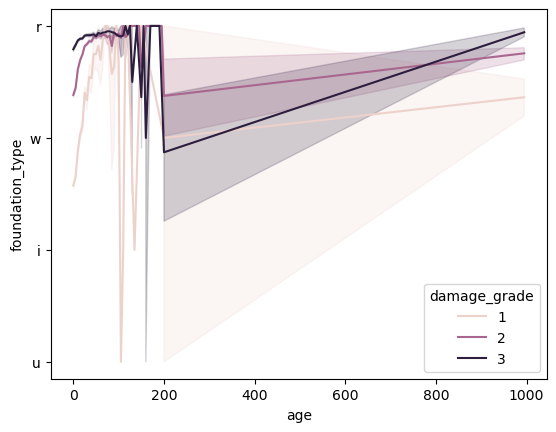

In [15]:
sns.lineplot(x='age',y='foundation_type',data=new_data,hue='damage_grade')

# Insights:

This line plot with hue provides a visual representation of how the age of buildings is associated with different foundation types while considering the varying degrees of earthquake damage. It can help identify trends and patterns in the data that can be useful for earthquake risk assessment and mitigation strategies.

In [16]:
new_data.area_percentage.value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
55         1
80         1
90         1
82         1
100        1
Name: area_percentage, Length: 84, dtype: int64

In [17]:
new_data.count_floors_pre_eq.value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

In [18]:
new_data.land_surface_condition.value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

<Axes: xlabel='age', ylabel='land_surface_condition'>

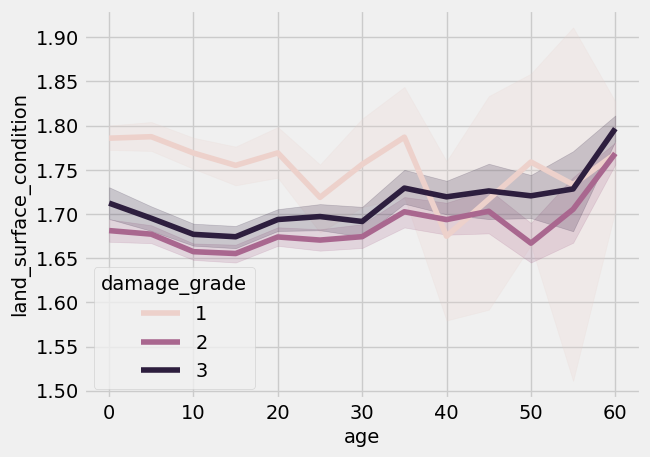

In [231]:
sns.lineplot(x='age',y='land_surface_condition',data=new_data,hue='damage_grade')

# Insights:

This line plot with hue provides a visual representation of how the age of buildings is associated with different land surface condition types while considering the varying degrees of earthquake damage.

In [22]:
new_data.foundation_type.value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

<Axes: xlabel='age', ylabel='foundation_type'>

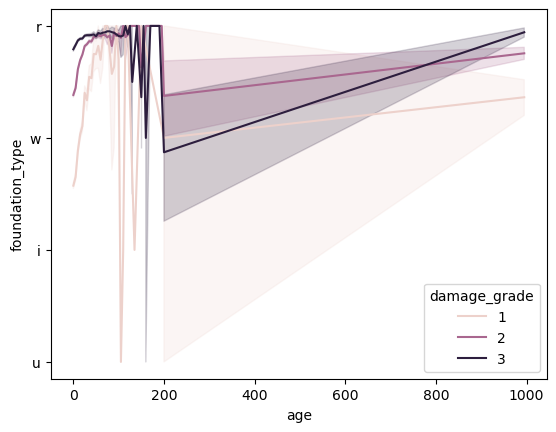

In [23]:
sns.lineplot(x='age',y='foundation_type',data=new_data,hue='damage_grade')

# Insights:
This line plot with hue provides a visual representation of how the age of buildings is associated with different foundation types while considering the varying degrees of earthquake damage. It can help identify trends and patterns in the data that can be useful for earthquake risk assessment and mitigation strategies.

In [24]:
new_data.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
160        6
170        6
175        5
135        5
190        3
145        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [25]:
new_data.age.nunique()

42

In [26]:
new_data.roof_type.value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

<Axes: xlabel='roof_type', ylabel='foundation_type'>

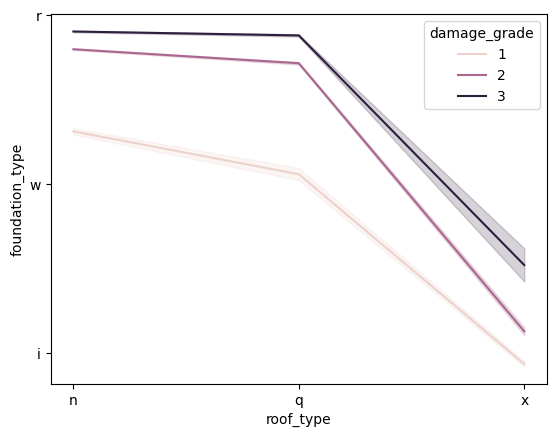

In [27]:
sns.lineplot(x='roof_type',y='foundation_type',data=new_data,hue='damage_grade')

# Insights:

This line plot with hue provides a visual representation of how the age of buildings is associated with different roof types while considering the varying degrees of earthquake damage.

In [28]:
new_data.ground_floor_type.value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

<Axes: xlabel='ground_floor_type', ylabel='foundation_type'>

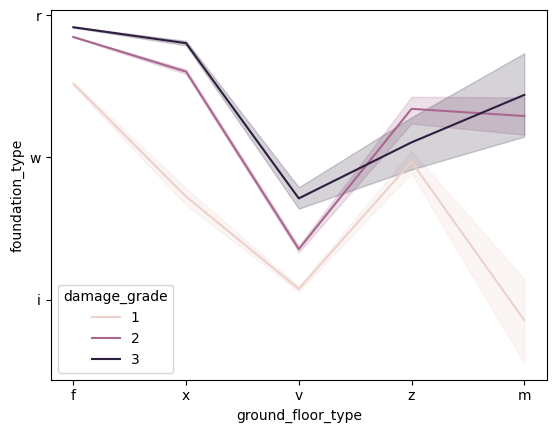

In [29]:
sns.lineplot(x='ground_floor_type',y='foundation_type',data=new_data,hue='damage_grade')

# Insights:

This line plot with hue provides a visual representation of how the age of buildings is associated with different ground floor types while considering the varying degrees of earthquake damage.

In [30]:
new_data.other_floor_type.value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

sns.lineplot(x='ground_floor_type',y='other_floor_type',data=new_data,hue='damage_grade')

# Insights:

This line plot with hue provides a visual representation of how the age of buildings is associated with different ground floor types while considering the varying degrees of earthquake damage.

In [32]:
new_data.position.value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

<Axes: xlabel='position', ylabel='foundation_type'>

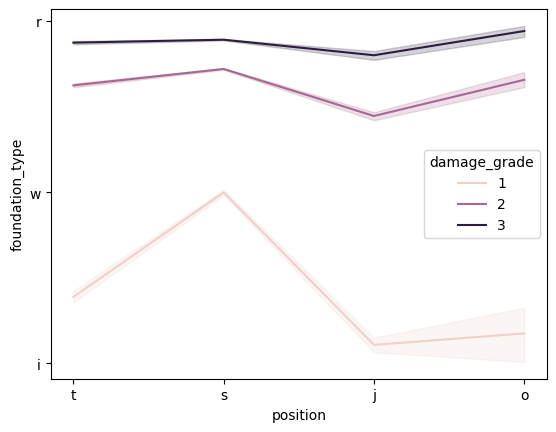

In [33]:
sns.lineplot(x='position',y='foundation_type',data=new_data,hue='damage_grade')

# Insights:

This line plot with hue provides a visual representation of how the age of buildings is associated with different positions  while considering the varying degrees of earthquake damage.

In [34]:
new_data.plan_configuration.value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

<Axes: xlabel='position', ylabel='plan_configuration'>

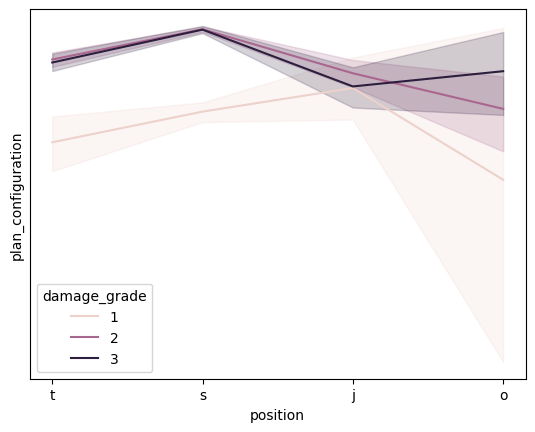

In [35]:
sns.lineplot(x='position',y='plan_configuration',data=new_data,hue='damage_grade')

# Insights:
This line plot with hue provides a visual representation of how the age of buildings is associated with different postition  while considering the varying degrees of earthquake damage.

In [36]:
new_data.legal_ownership_status.value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

<Axes: xlabel='foundation_type', ylabel='legal_ownership_status'>

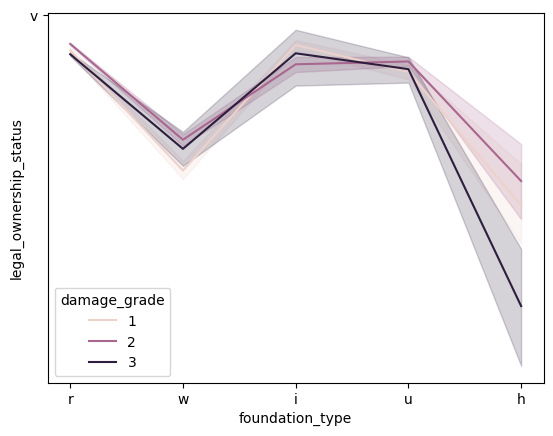

In [37]:
sns.lineplot(x='foundation_type',y='legal_ownership_status',data=new_data,hue='damage_grade')

In [38]:
new_data.count_families.value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

# EDA

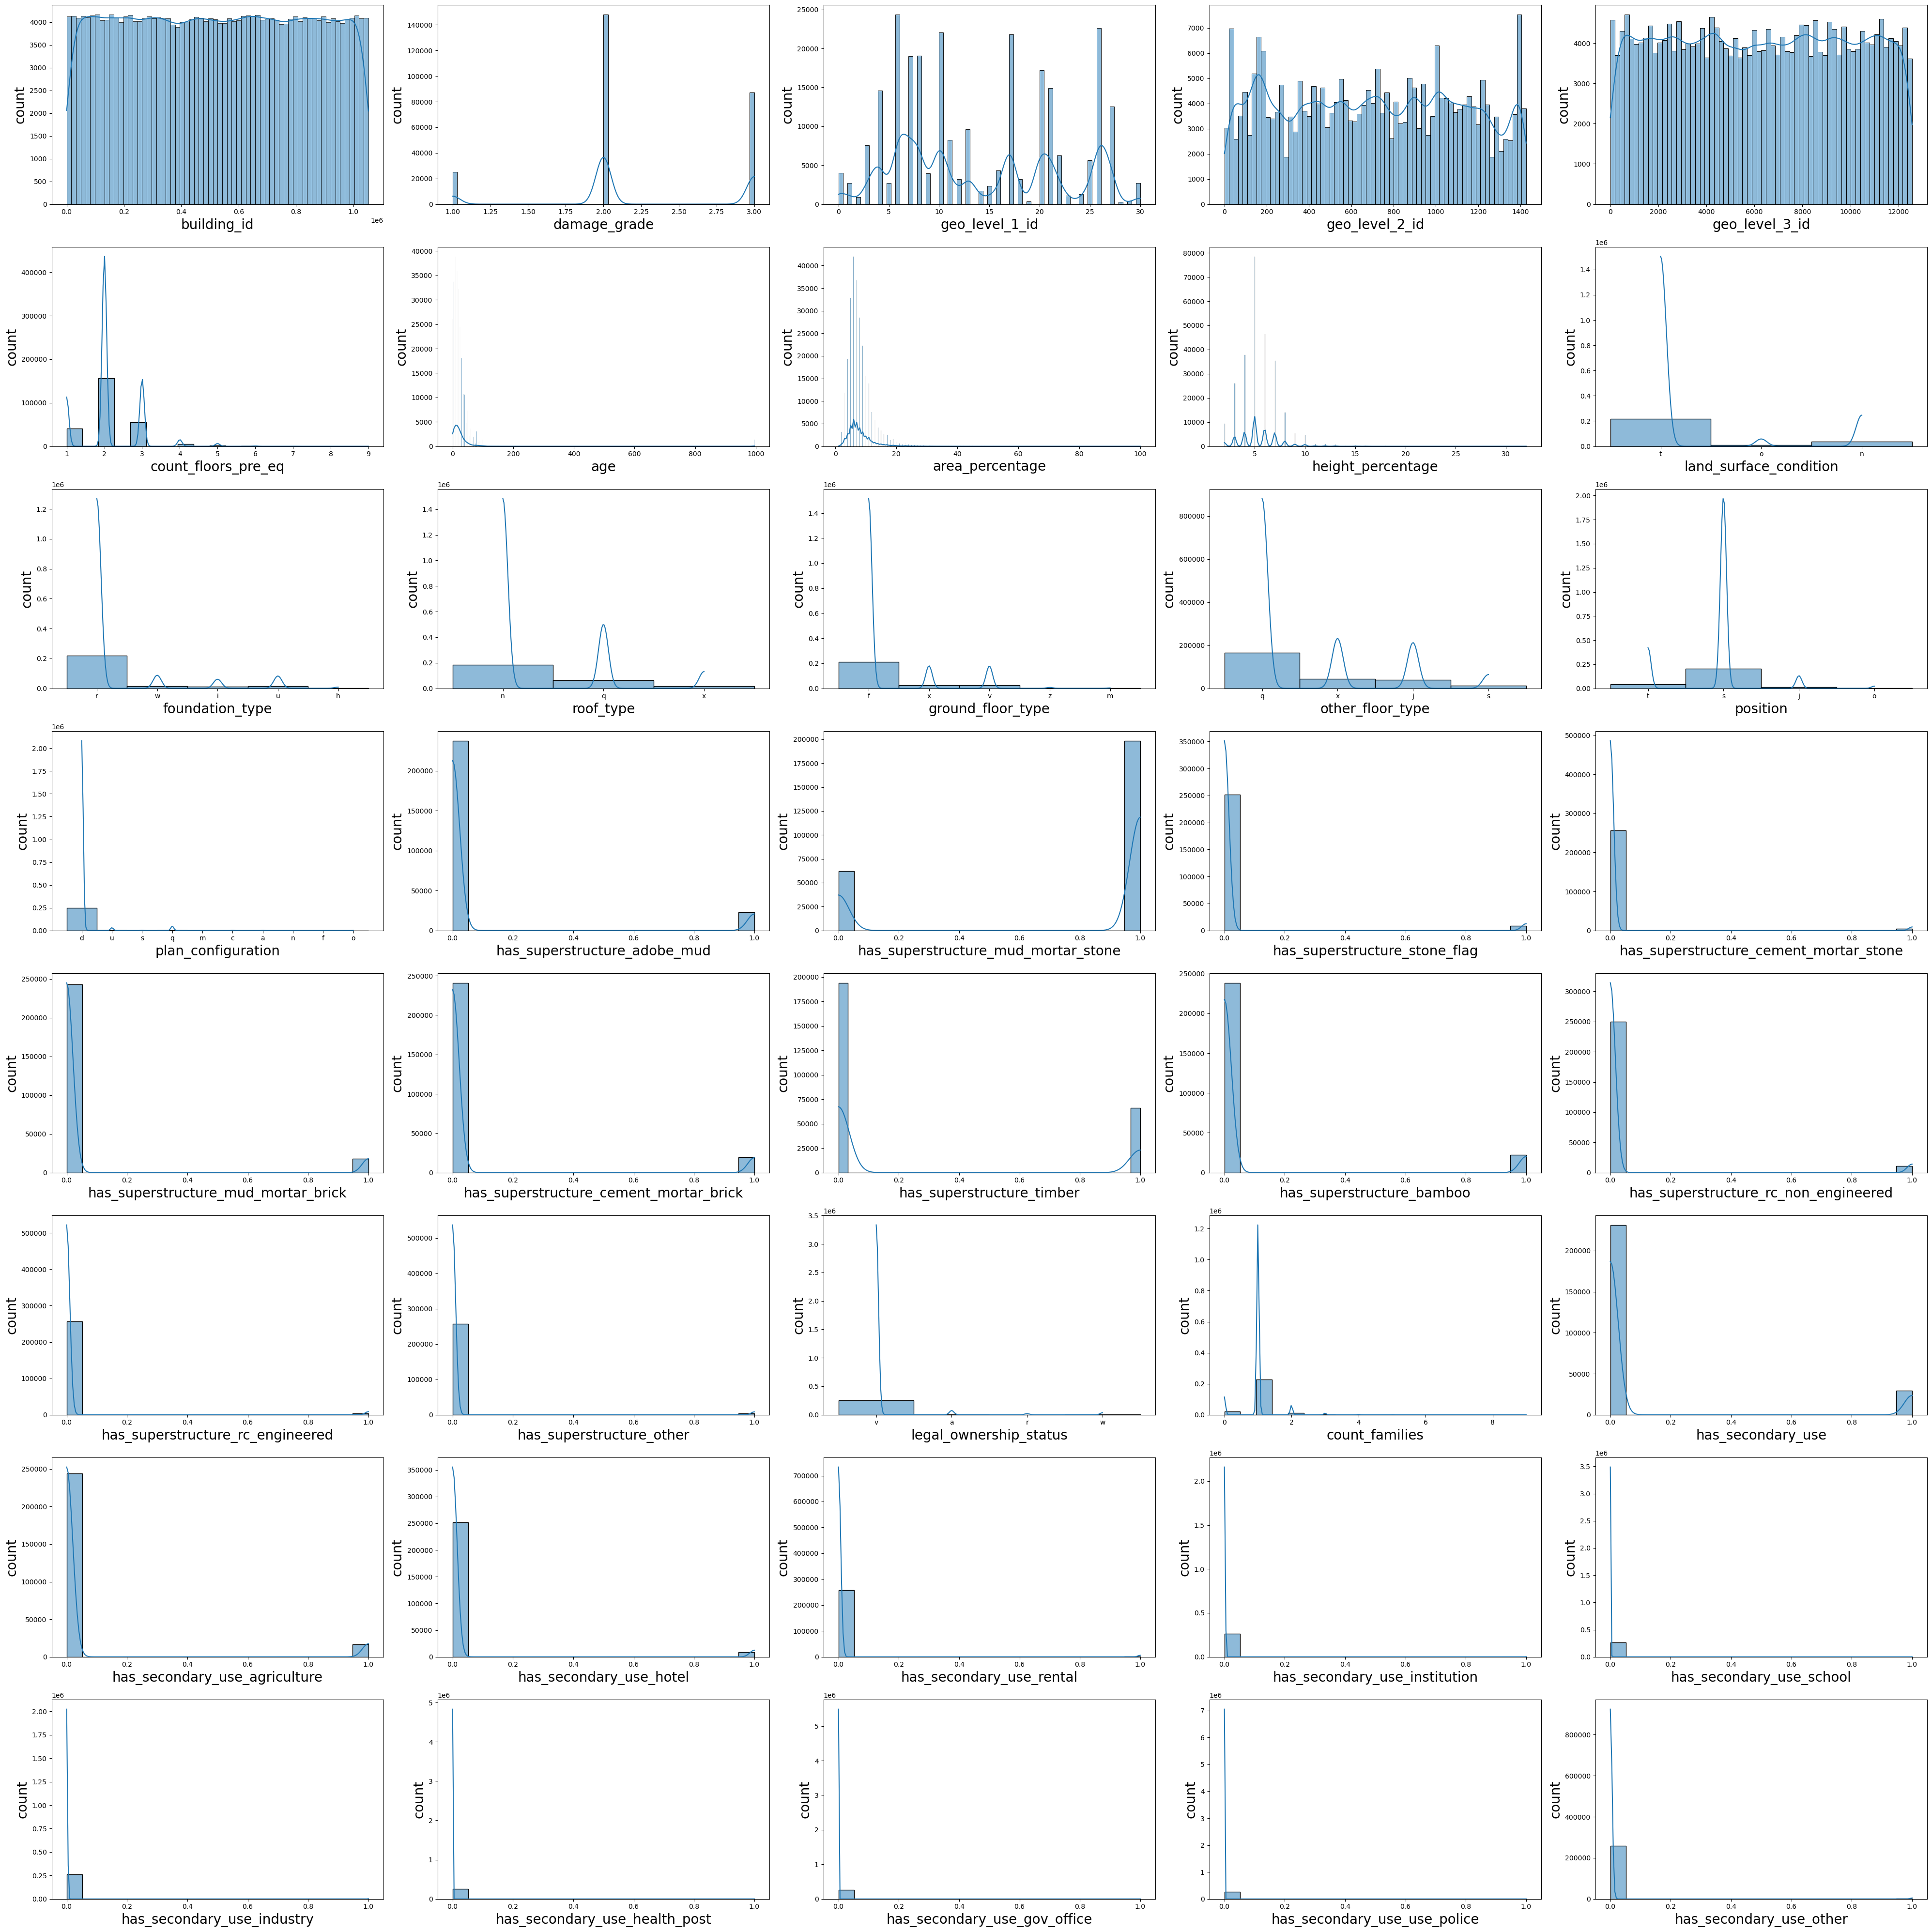

In [39]:
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1

for column in new_data:
    if plotnumber<=49:
        ax=plt.subplot(8,5,plotnumber)
        sns.histplot(new_data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
        plotnumber+=1
        plt.tight_layout()

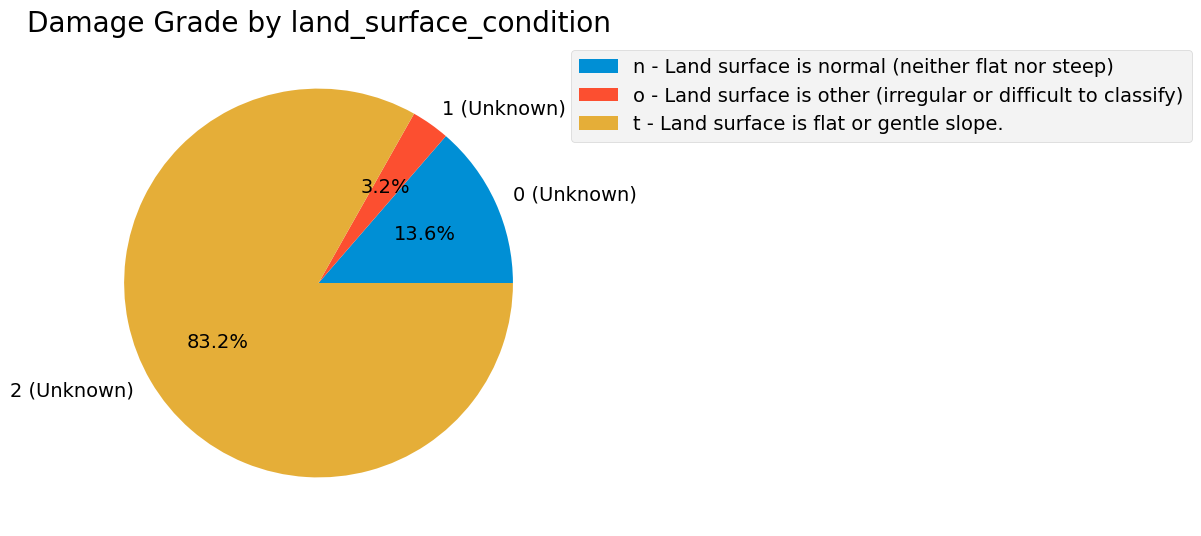

In [279]:
data = new_data.groupby('land_surface_condition')['damage_grade'].count()
 #  where   'n': 'Land surface is normal (neither flat nor steep)'/
 #  'o': 'Land surface is other (irregular or difficult to classify)',
 #  't': 'Land surface is flat or gentle slope.'
explode=[0,0.3,0.1]
plt.pie(data, labels=data.index, autopct="%0.1f%%",radius=1.5,explode=explode)
plt.show()

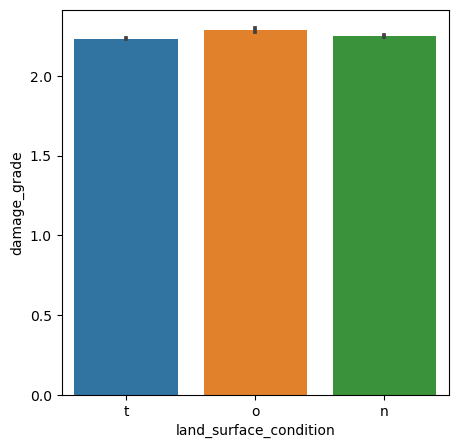

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(x='land_surface_condition',y='damage_grade',data=new_data)
plt.show()

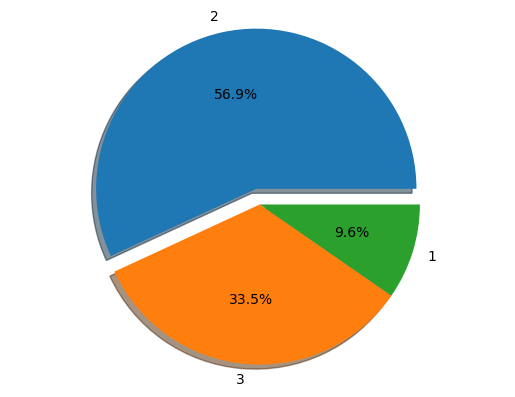

In [42]:
# create a pie chart to visualize the distribution of values in the 'damage_grade' 

percent =list(new_data['damage_grade'].value_counts()/len(new_data['damage_grade'])*100)
label = list(new_data['damage_grade'].value_counts().index)
explode = (0.1,0,0)
fig,ax1 = plt.subplots()
ax1.pie(percent, explode=explode, labels=label, autopct='%1.1f%%', 
shadow=True)
ax1.axis('equal')
plt.legend
plt.show()


# insights:

1 represents low damage 3 represents a medium amount of damage 2 represents almost complete destruction

From this plot, it is easy to see that our dataset is very imbalanced. Damage category 2 & 3 are higher than 1.

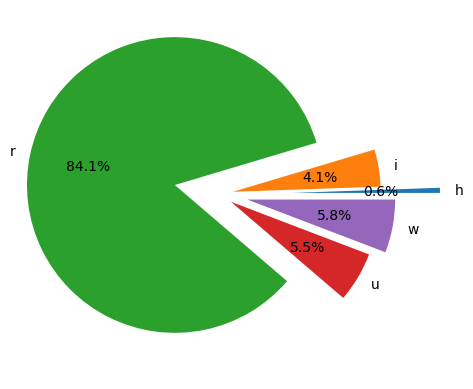

In [43]:
data2 = new_data.groupby('foundation_type')['damage_grade'].count()
# where 'h': 'Foundation type is heavy (e.g., reinforced concrete).',
   #    'i': 'Foundation type is i-beam/timber.',
   #    'r': 'Foundation type is masonry (e.g., brick or stone).',
   #    'u': 'Foundation type is bamboo.',
   #    'w': 'Foundation type is wood.',
explode=[0.5,0.1,0.3,0.1,0.2]
plt.pie(data2, labels=data2.index, autopct="%0.1f%%", explode=explode)
plt.show()

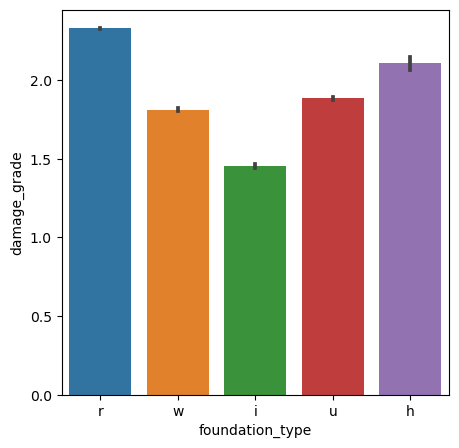

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(x='foundation_type',y='damage_grade',data=new_data) 
plt.show()

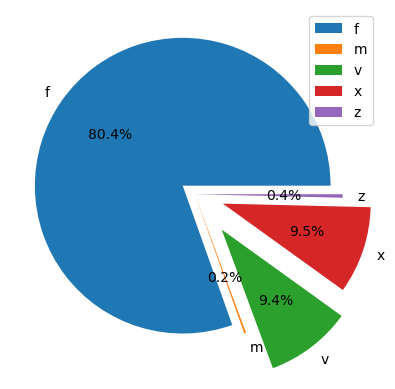

In [45]:
data3 = new_data.groupby('ground_floor_type')['damage_grade'].count()

explode=[0.1,0,0.3,0.2,0]
plt.pie(data3, labels=data3.index, autopct="%0.1f%%", explode=explode )
plt.legend()
plt.show()

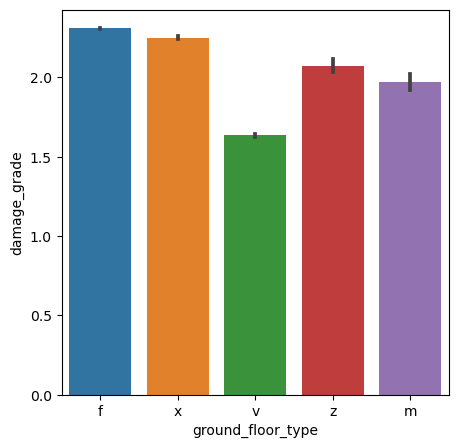

In [46]:
plt.figure(figsize=(5,5))
sns.barplot(x='ground_floor_type',y='damage_grade',data=new_data) 
plt.show()

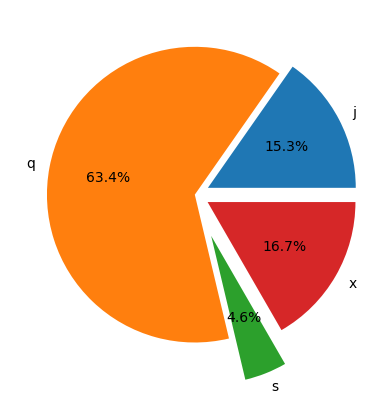

In [47]:
data4 = new_data.groupby('other_floor_type')['damage_grade'].count()

explode=[0.1,0,0.3,0.1]
plt.pie(data4, labels=data4.index, autopct="%0.1f%%", explode=explode)
plt.show()

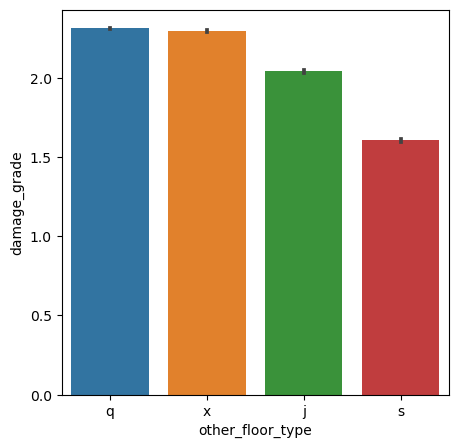

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x='other_floor_type',y='damage_grade',data=new_data) 
plt.show()

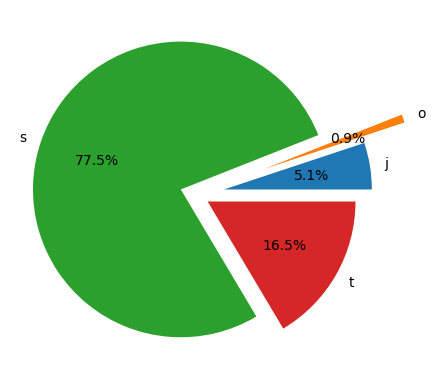

In [49]:
data5 = new_data.groupby('position')['damage_grade'].count()
# where  'j': 'Building is in a corner.',
  #      'o': 'Building is an "other" position (neither in a corner nor on an edge).',
 #       't': 'Building is along the side of the road.',
 #      's': 'Building is on the top or ridge.',
explode=[0.2,0.5,0.1,0.1]
plt.pie(data5, labels=data5.index, autopct="%0.1f%%", explode=explode)
plt.show()

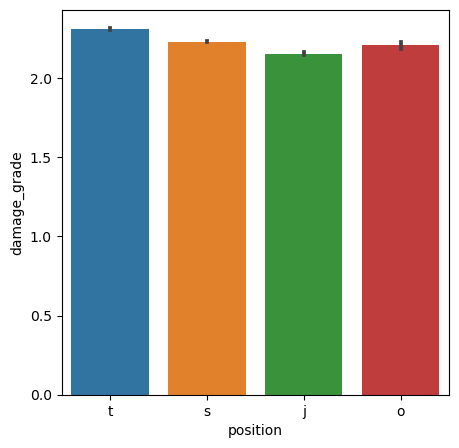

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x='position',y='damage_grade',data=new_data) 
plt.show()

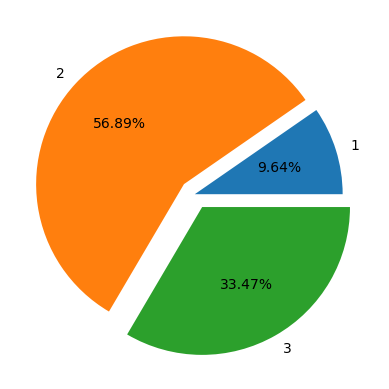

In [51]:
data6 = new_data.groupby('damage_grade')['plan_configuration'].count()

explode=[0,0.1,0.1]
plt.pie(data6, labels=data6.index, autopct="%0.2f%%", explode=explode)
plt.show()

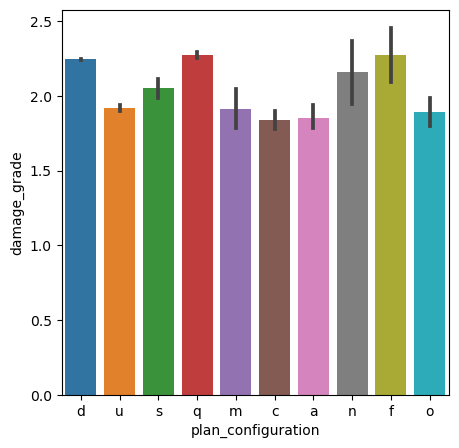

In [52]:
plt.figure(figsize=(5,5))
sns.barplot(x='plan_configuration',y='damage_grade',data=new_data) 
plt.show()

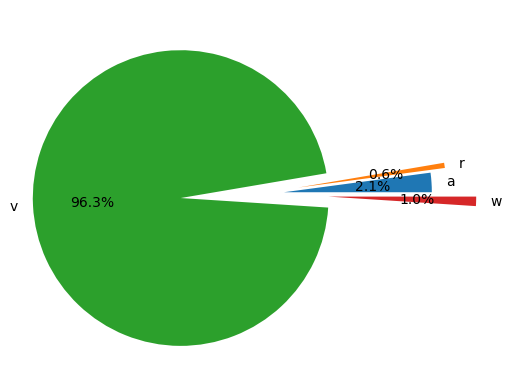

In [53]:
data7 = new_data.groupby('legal_ownership_status')['damage_grade'].count()
# where  'a': 'Legal ownership status is "private.',
#       'r': 'Legal ownership status is "renewable lease.',
#       'v': 'Legal ownership status is "public.',
#       'w': 'Legal ownership status is "institutional.',
explode=[0.2,0.3,0.5,0.5]
plt.pie(data7, labels=data7.index, autopct="%0.1f%%", explode=explode )
plt.show()

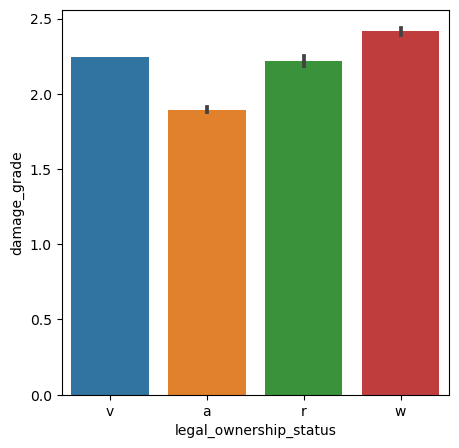

In [54]:
plt.figure(figsize=(5,5))
sns.barplot(x='legal_ownership_status',y='damage_grade',data=new_data)  # where n=0, q=1 & x=2
plt.show()

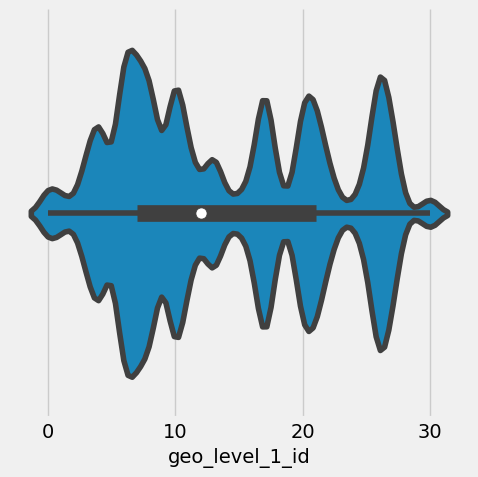

In [215]:
sns.catplot(x='geo_level_1_id',kind='violin',data=new_data)

In [216]:
e=new_data[new_data['geo_level_1_id'] & new_data['age'].argmin() & new_data['damage_grade']==2]
per_d=len(e)/len(new_data)*100
per_d
print(f"the percentage is l/a/d2: {per_d:.2f}%")

the percentage is l/a/d2: 38.49%


In [217]:
e1=new_data[new_data['geo_level_1_id'] & new_data['age'].argmin() & new_data['damage_grade']==2]
per_d1=len(e1)/len(new_data)*100
per_d1
print(f"the percentage is l/a/d2: {per_d1:.2f}%")

the percentage is l/a/d2: 38.49%


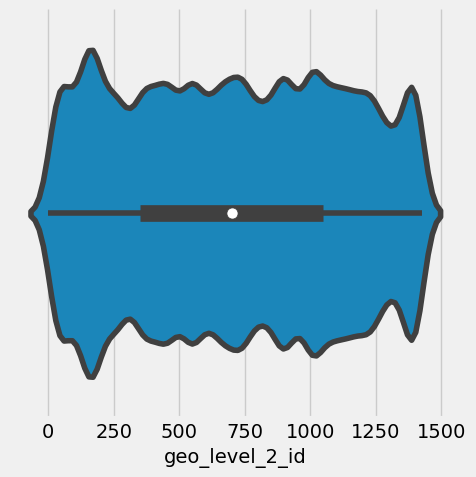

In [219]:
sns.catplot(x='geo_level_2_id',kind='violin',data=new_data)

In [220]:
w=new_data[new_data['geo_level_2_id'] & new_data['age'].argmin() & new_data['damage_grade']<=1]
per_s=len(w)/len(new_data)*100
per_s
print(f"the percentage is l/a/d2: {per_s:.2f}%")

the percentage is l/a/d2: 54.45%


In [221]:
w1=new_data[new_data['geo_level_2_id'] & new_data['age'].argmin() & new_data['damage_grade']==2]
per_s1=len(w1)/len(new_data)*100
per_s1
print(f"the percentage is l/a/d2: {per_s1:.2f}%")

the percentage is l/a/d2: 36.61%


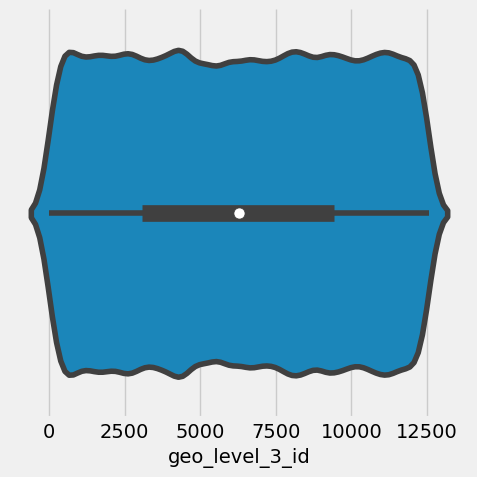

In [222]:
sns.catplot(x='geo_level_3_id',kind='violin',data=new_data)

In [223]:
q=new_data[new_data['geo_level_3_id']  & new_data['damage_grade']==2]
per_a=len(q)/len(new_data)*100
per_a
print(f"the percentage is l/a/d2: {per_a:.2f}%")

the percentage is l/a/d2: 36.42%


In [224]:
q1=new_data[new_data['geo_level_3_id'] & new_data['age'].argmax() & new_data['damage_grade']==2]
per_a1=len(q1)/len(new_data)*100
per_a1
print(f"the percentage is l/a/d2: {per_a1:.2f}%")

the percentage is l/a/d2: 0.00%


In [225]:
q2=new_data[new_data['geo_level_3_id'] & new_data['age'].argmin() & new_data['damage_grade']==2]
per_a2=len(q2)/len(new_data)*100
per_a2
print(f"the percentage is l/a/d2: {per_a2:.2f}%")

the percentage is l/a/d2: 36.42%


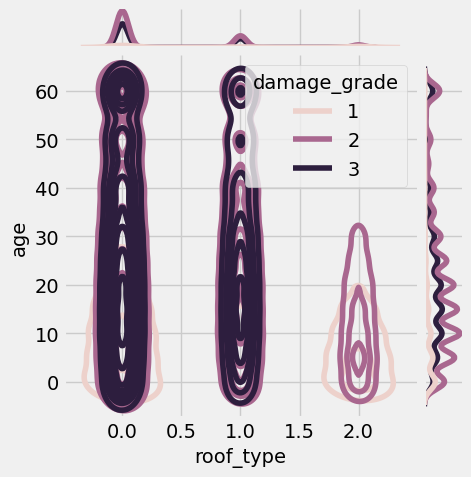

In [227]:
sns.jointplot(x=new_data['roof_type'],y=new_data['age'],kind='kde',hue=new_data['damage_grade'],height=5,ratio=8,data=new_data)

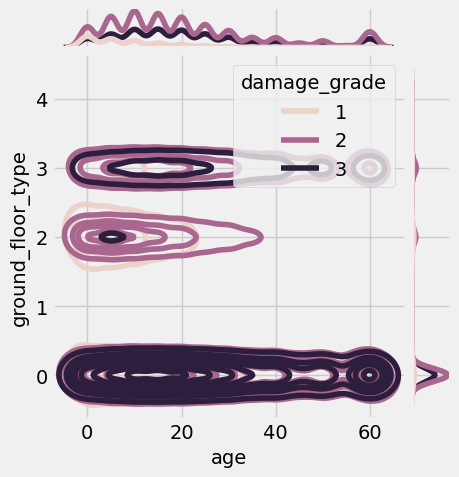

In [228]:
sns.jointplot(x=new_data['age'],y=new_data['ground_floor_type'],kind='kde',hue=new_data['damage_grade'],height=5,ratio=8,data=new_data)

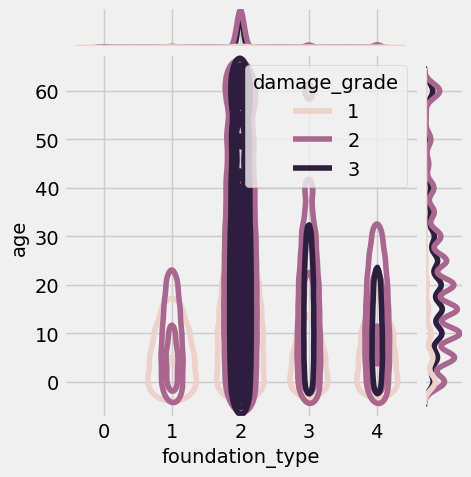

In [229]:
sns.jointplot(x=new_data['foundation_type'],y=new_data['age'],kind='kde',hue=new_data['damage_grade'],height=5,ratio=8,data=new_data)

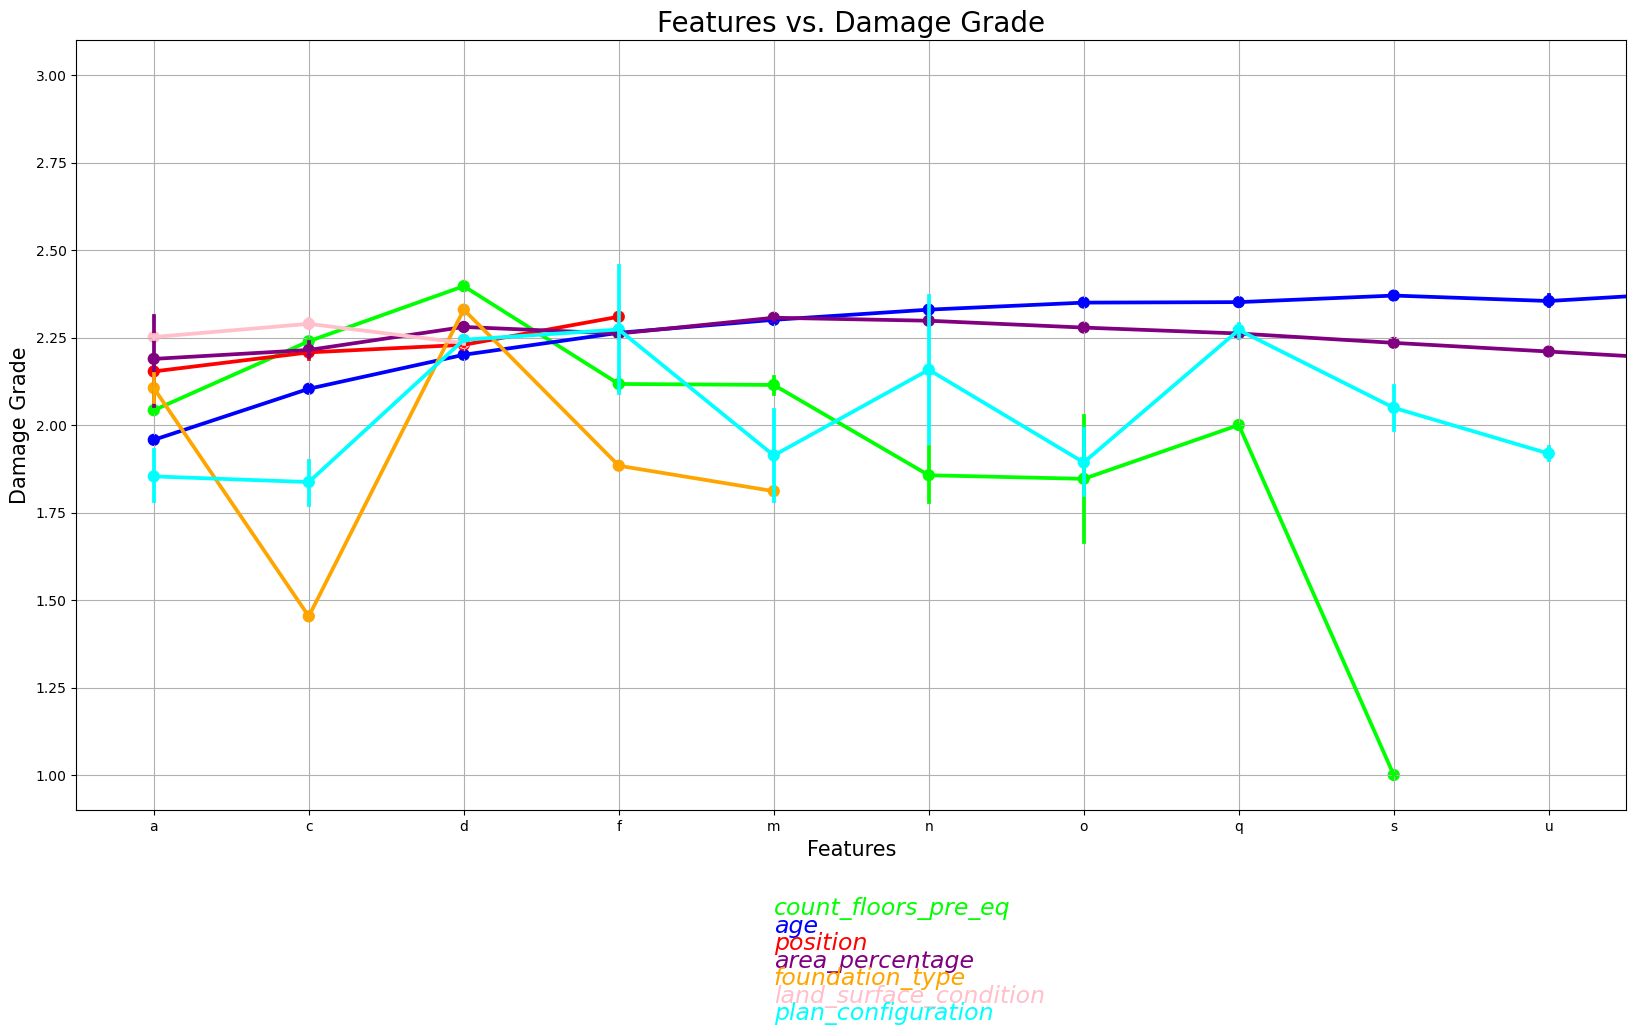

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
f, ax1 = plt.subplots(figsize=(20, 10))

# Define the order of x-axis categories for some features
order_count_floors = sorted(new_data['count_floors_pre_eq'].unique())
order_position = sorted(new_data['position'].unique())
order_foundation_type = sorted(new_data['foundation_type'].unique())
order_land_surface_condition = sorted(new_data['land_surface_condition'].unique())
order_plan_configuration = sorted(new_data['plan_configuration'].unique())

# Create point plots for different features
sns.pointplot(x='count_floors_pre_eq', y='damage_grade', data=new_data, color='lime', order=order_count_floors, ax=ax1)
sns.pointplot(x='age', y='damage_grade', data=new_data, color='blue', ax=ax1)
sns.pointplot(x='position', y='damage_grade', data=new_data, color='red', order=order_position, ax=ax1)
sns.pointplot(x='area_percentage', y='damage_grade', data=new_data, color='purple', ax=ax1)  # Added area_percentage
sns.pointplot(x='foundation_type', y='damage_grade', data=new_data, color='orange', order=order_foundation_type, ax=ax1)
sns.pointplot(x='land_surface_condition', y='damage_grade', data=new_data, color='pink', order=order_land_surface_condition, ax=ax1)
sns.pointplot(x='plan_configuration', y='damage_grade', data=new_data, color='cyan', order=order_plan_configuration, ax=ax1)

# Add labels for the features
plt.text(4, 0.6, 'count_floors_pre_eq', color='lime', fontsize=17, style='italic')
plt.text(4, 0.55, 'age', color='blue', fontsize=17, style='italic')
plt.text(4, 0.5, 'position', color='red', fontsize=17, style='italic')
plt.text(4, 0.45, 'area_percentage', color='purple', fontsize=17, style='italic')  # Added label for area_percentage
plt.text(4, 0.4, 'foundation_type', color='orange', fontsize=17, style='italic')
plt.text(4, 0.35, 'land_surface_condition', color='pink', fontsize=17, style='italic')
plt.text(4, 0.3, 'plan_configuration', color='cyan', fontsize=17, style='italic')

# Set axis labels and title
plt.xlabel('Features', fontsize=15, color='black')
plt.ylabel('Damage Grade', fontsize=15, color='black')
plt.title('Features vs. Damage Grade', fontsize=20, color='black')

# Show grid lines
plt.grid()

# Show the plot
plt.show()

# Insights:

1.count_floors_pre_eq:(LIME)  This feature represents the number of floors in the building before the earthquake. The plot shows that as the number of floors increases, the damage grade also tends to increase. This could be because multi-story buildings are more likely to sustain severe damage during an earthquake.

2.age:(BLUE) This feature represents the age of the building. The plot shows that older buildings tend to have a higher damage grade. This could be due to several factors such as wear and tear over time, outdated construction techniques, or lack of maintenance.

3.position:(RED) This feature likely represents the position of the building in relation to other buildings or landmarks. The plot shows varying damage grades for different positions, suggesting that a building's position may influence its vulnerability to earthquakes.

4.area_percentage:(PURPLE) This feature represents the normalized area of the building footprint. The plot shows that buildings with a larger area percentage tend to have a higher damage grade. This could be because larger buildings have more mass, making them more susceptible to earthquake forces.

5.foundation_type:(ORANGE) This feature represents the type of foundation used in the building. The plot shows varying damage grades for different foundation types, suggesting that the type of foundation can significantly impact a building's resistance to earthquakes.

6.land_surface_condition:(PINK) This feature likely represents the condition of the land where the building is located. The plot shows varying damage grades for different land surface conditions, indicating that certain conditions may make a building more vulnerable to earthquakes.

7.plan_configuration:(CYAN) This feature likely represents the layout or floor plan of the building. The plot shows varying damage grades for different plan configurations, suggesting that certain layouts may be more susceptible to damage during an earthquake.


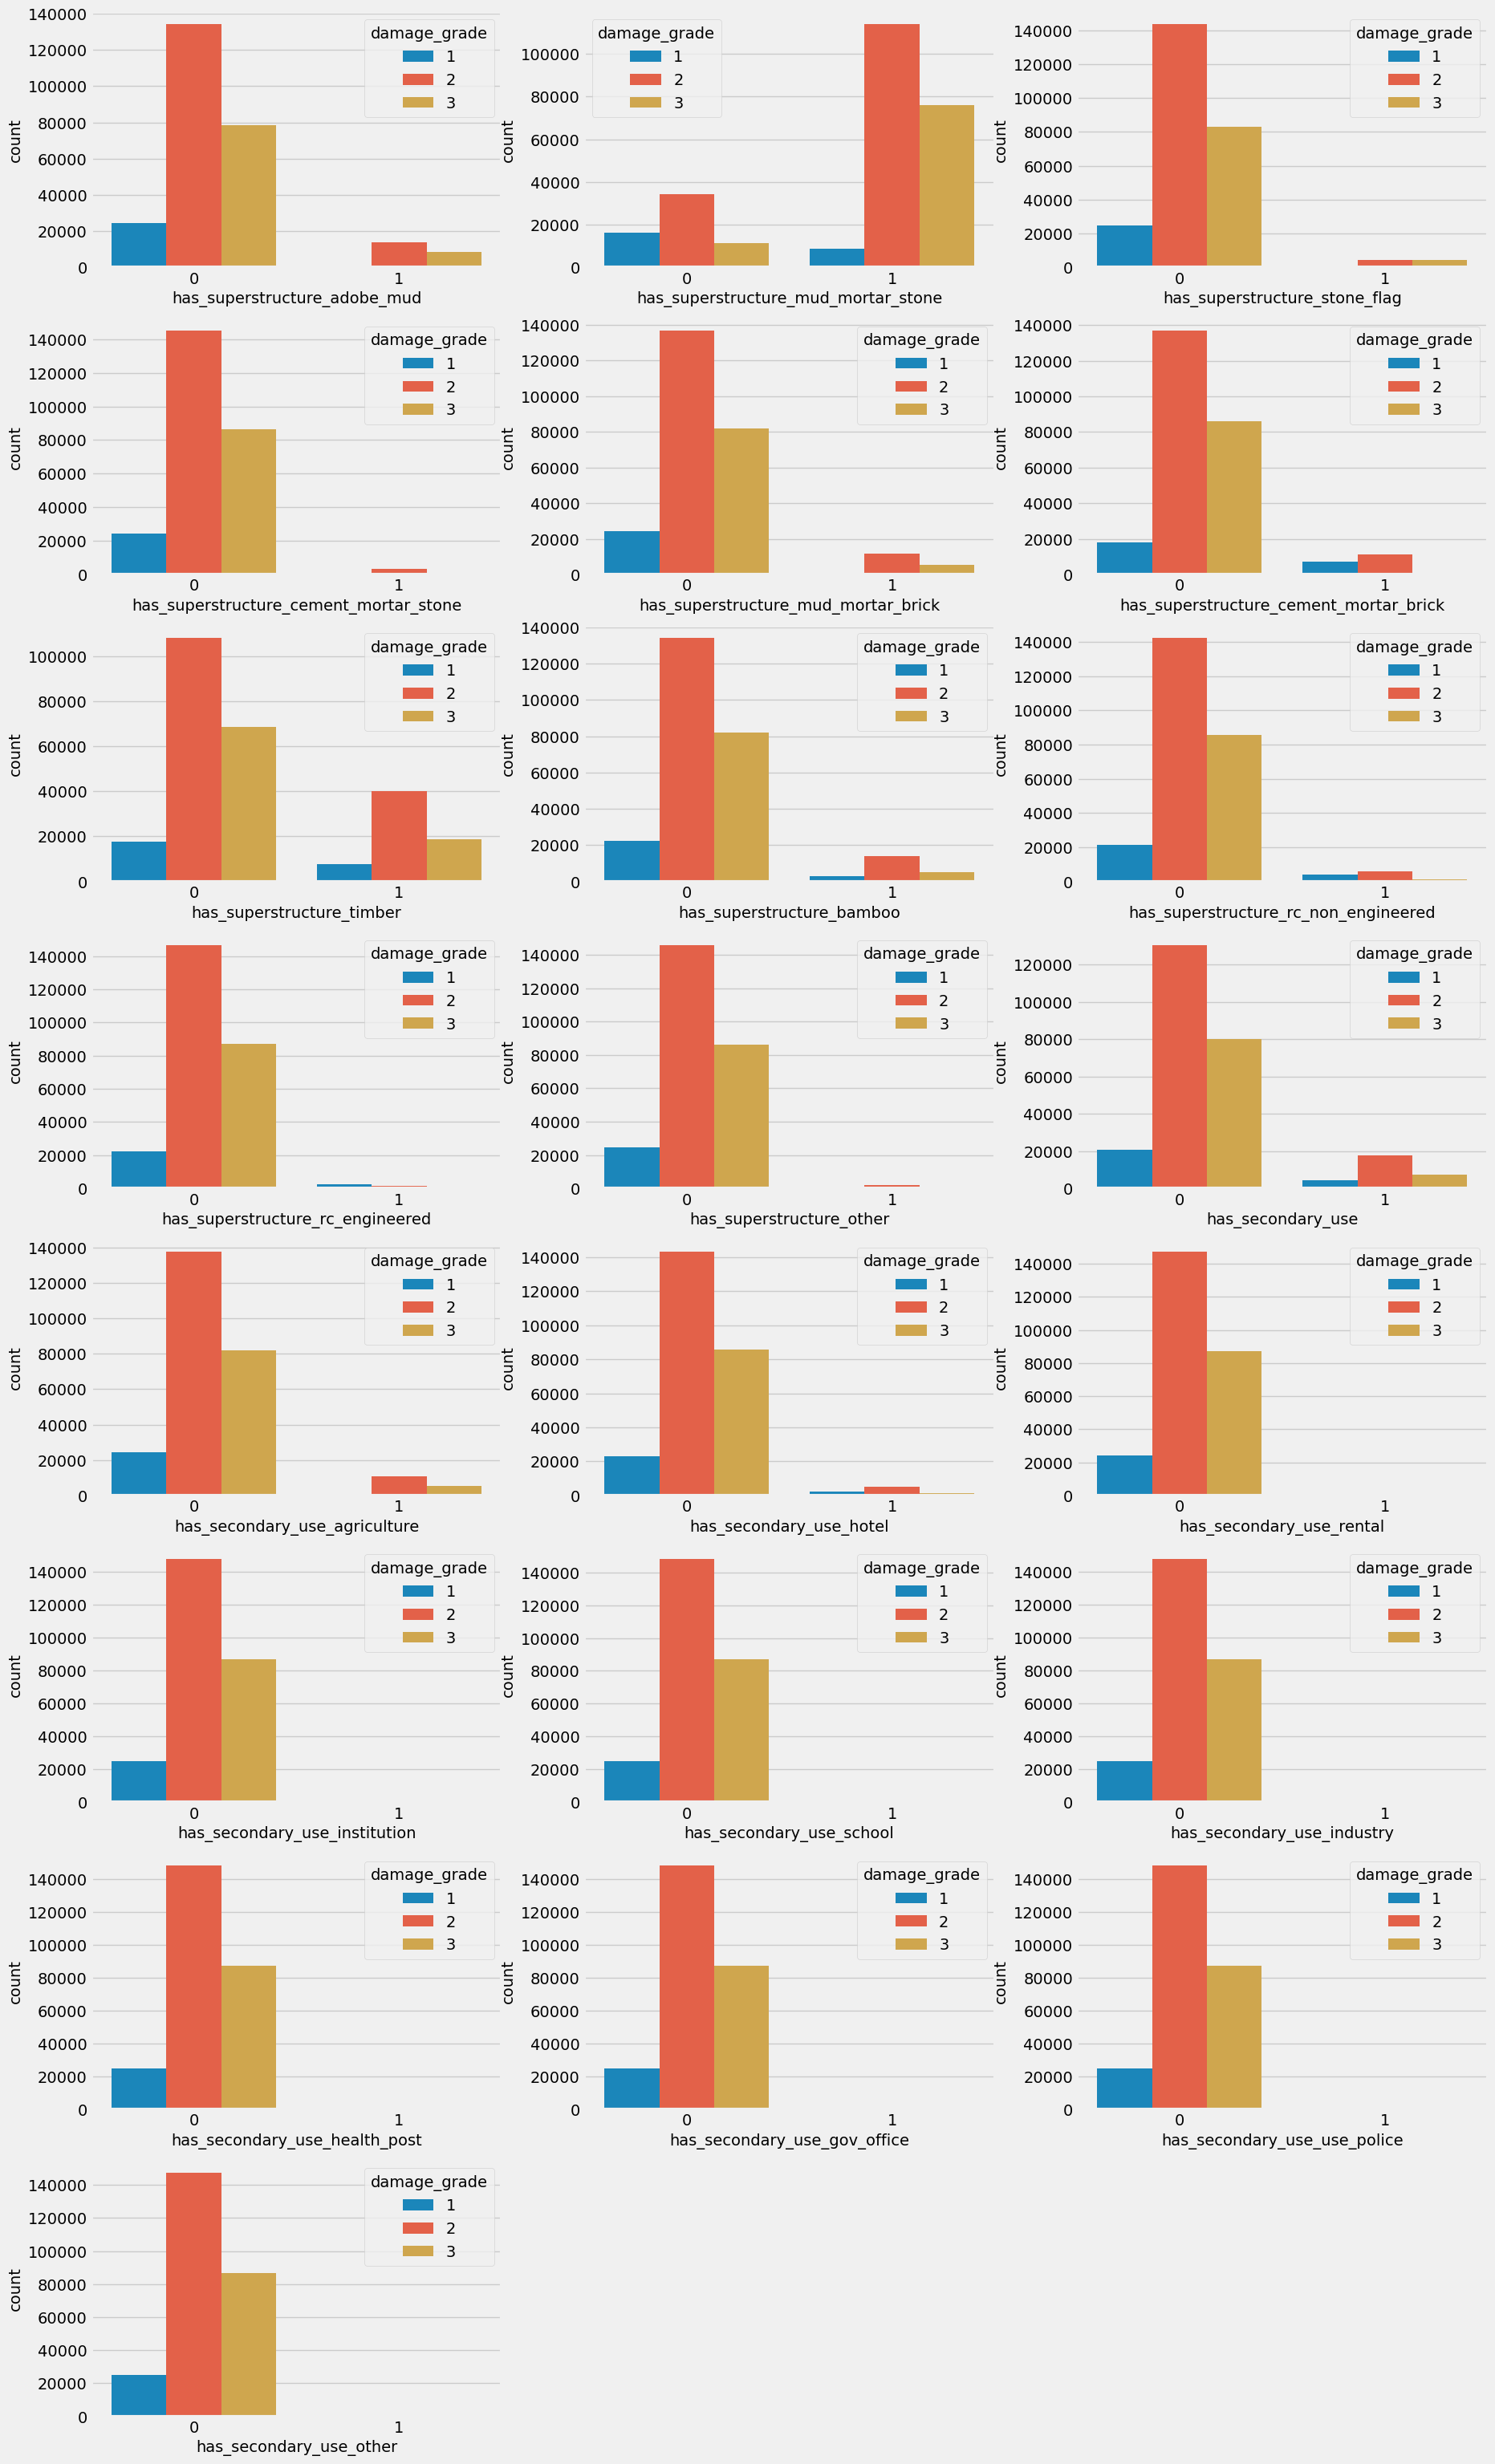

In [56]:
# Filter columns that start with 'has' and are binary (0 or 1)
binary_columns = [col for col in new_data.columns if col.startswith('has') and set(new_data[col]) == {0, 1}]

def count_plot(binary_columns):
    plt.rcParams['font.size'] = 18
    plt.style.use('fivethirtyeight')

    fig = plt.figure(figsize=(20, 37))
    for i, col in enumerate(binary_columns):
        ax = fig.add_subplot(8, 3, i + 1)
        sns.countplot(data=new_data, x=col, hue=new_data['damage_grade'])
        
    plt.show()

count_plot(binary_columns)

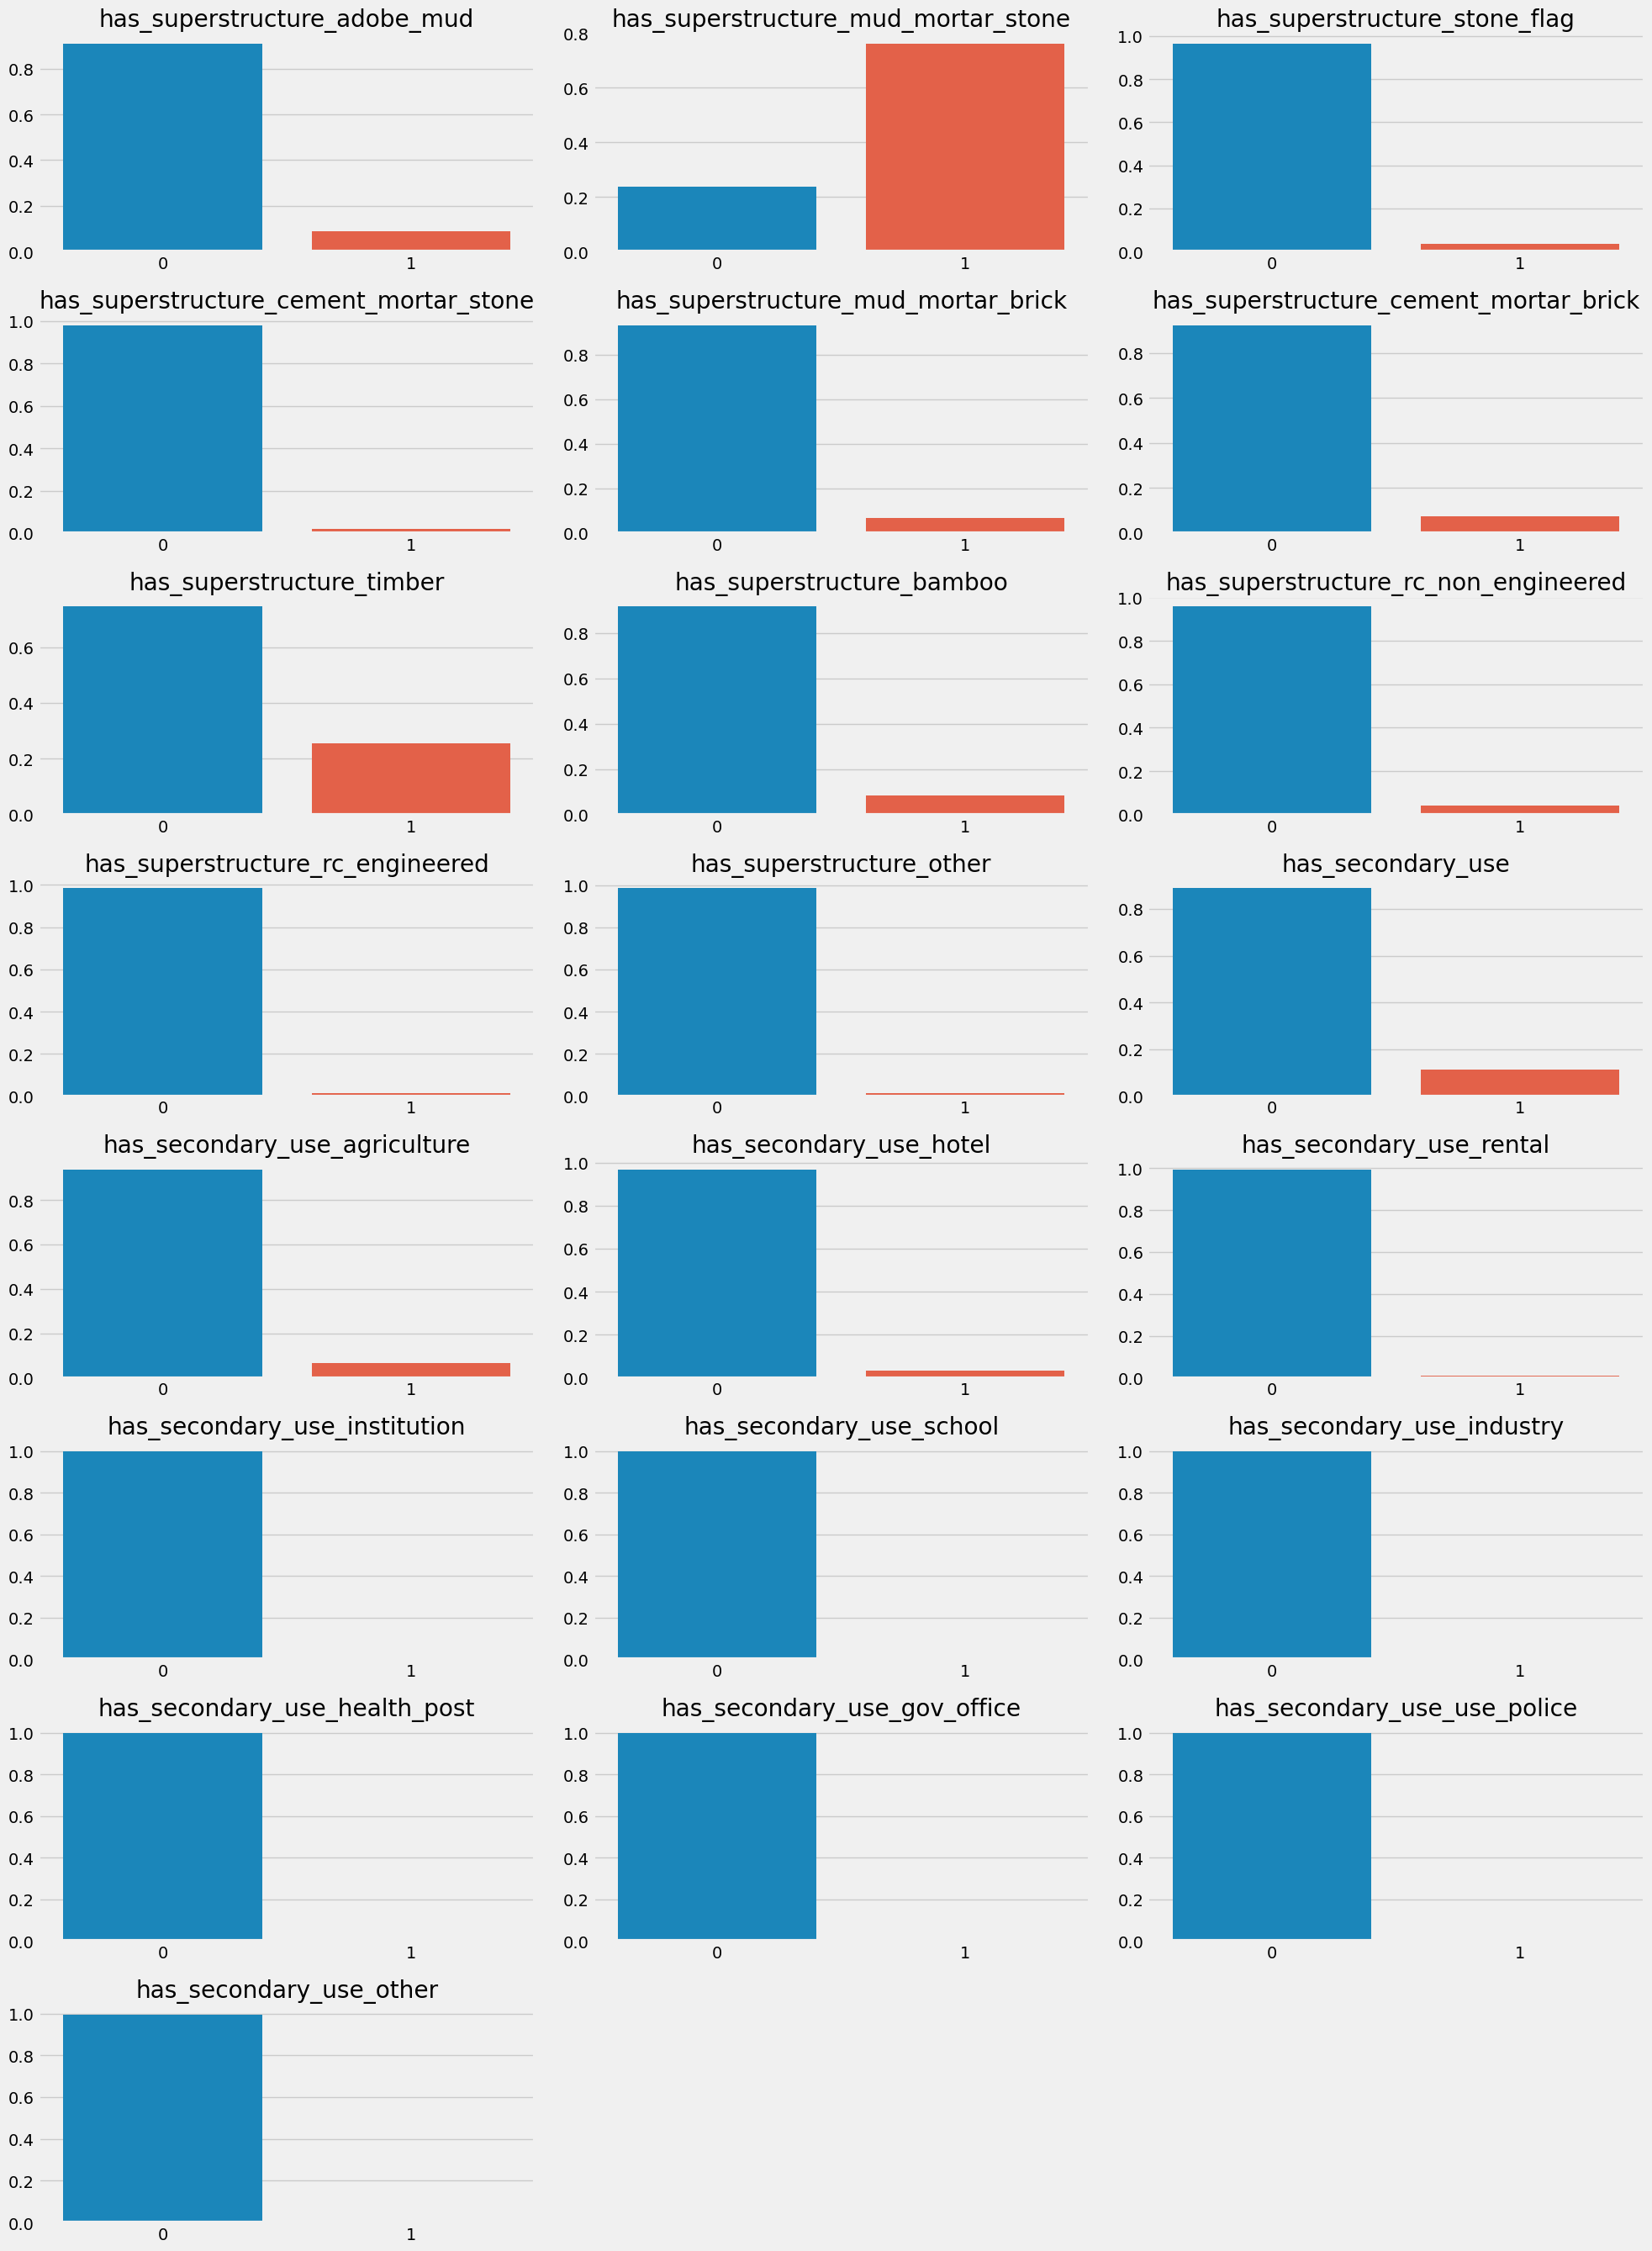

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter columns that start with 'has' and are binary (0 or 1)
binary_columns = [col for col in new_data.columns if col.startswith('has') and set(new_data[col]) == {0, 1}]

def count_plot(binary_columns):
    plt.rcParams['font.size'] = 18
    plt.style.use('fivethirtyeight')

    fig = plt.figure(figsize=(20, 27))
    for i, col in enumerate(binary_columns):
        ax = fig.add_subplot(8, 3, i + 1)

        # Calculate proportions of 1s and 0s
        proportions = new_data[col].value_counts(normalize=True)

        # Plot the proportions
        sns.barplot(x=proportions.index, y=proportions.values, ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

count_plot(binary_columns)


# Insights:

All the binary columns on y axis we can see that % of 0 is more,which means these perticular materials are not used for construction, except has_superstructure_mud_mortar_stone whose % of 1 is more , which means the use of that perticular product is more than 70% .

 

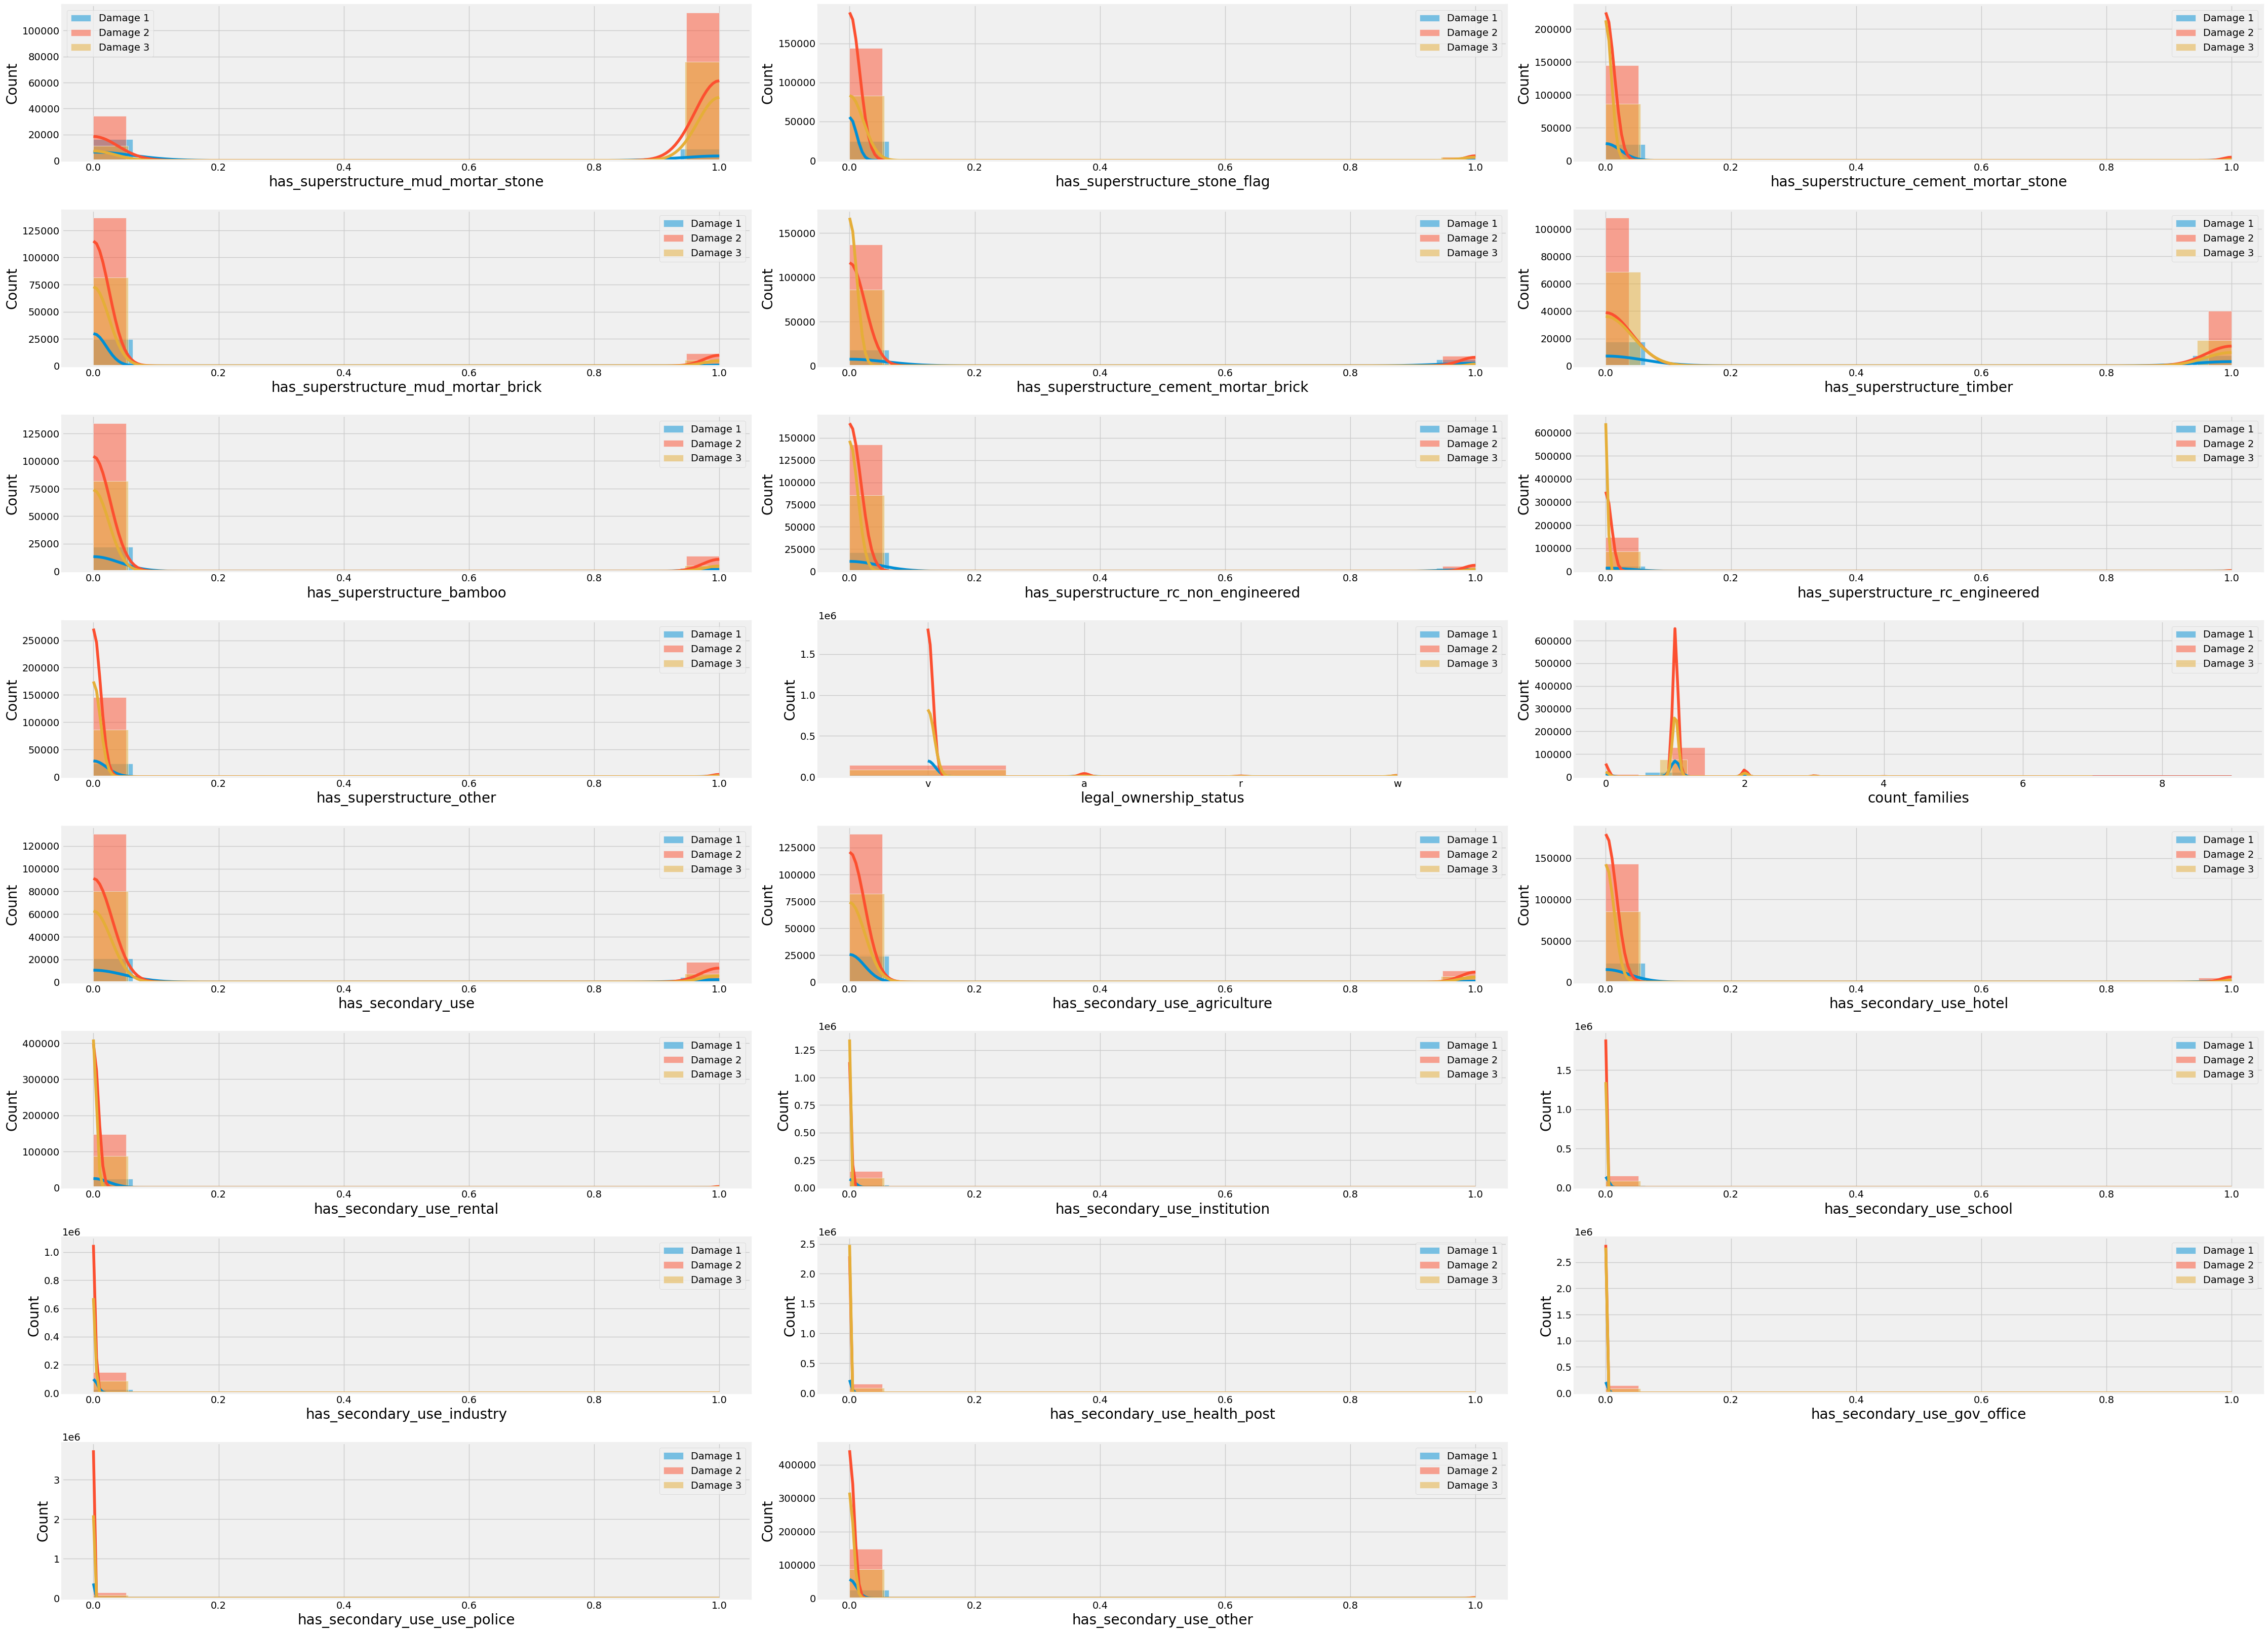

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(45, 40), facecolor='white')
plotnumber = 1

# Specify the damage grades you want to differentiate
damage_grades = [1, 2, 3]

for column in new_data.iloc[:, 17:40]:  
    if plotnumber <= 81:  
        ax = plt.subplot(10, 3, plotnumber)

        
        for damage_grade in damage_grades:
            sns.histplot(new_data[new_data['damage_grade'] == damage_grade][column], kde=True, label=f'Damage {damage_grade}')

        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count', fontsize=20)
        plt.legend()  # Add a legend to differentiate damage grades
        plotnumber += 1

plt.tight_layout()
plt.show()


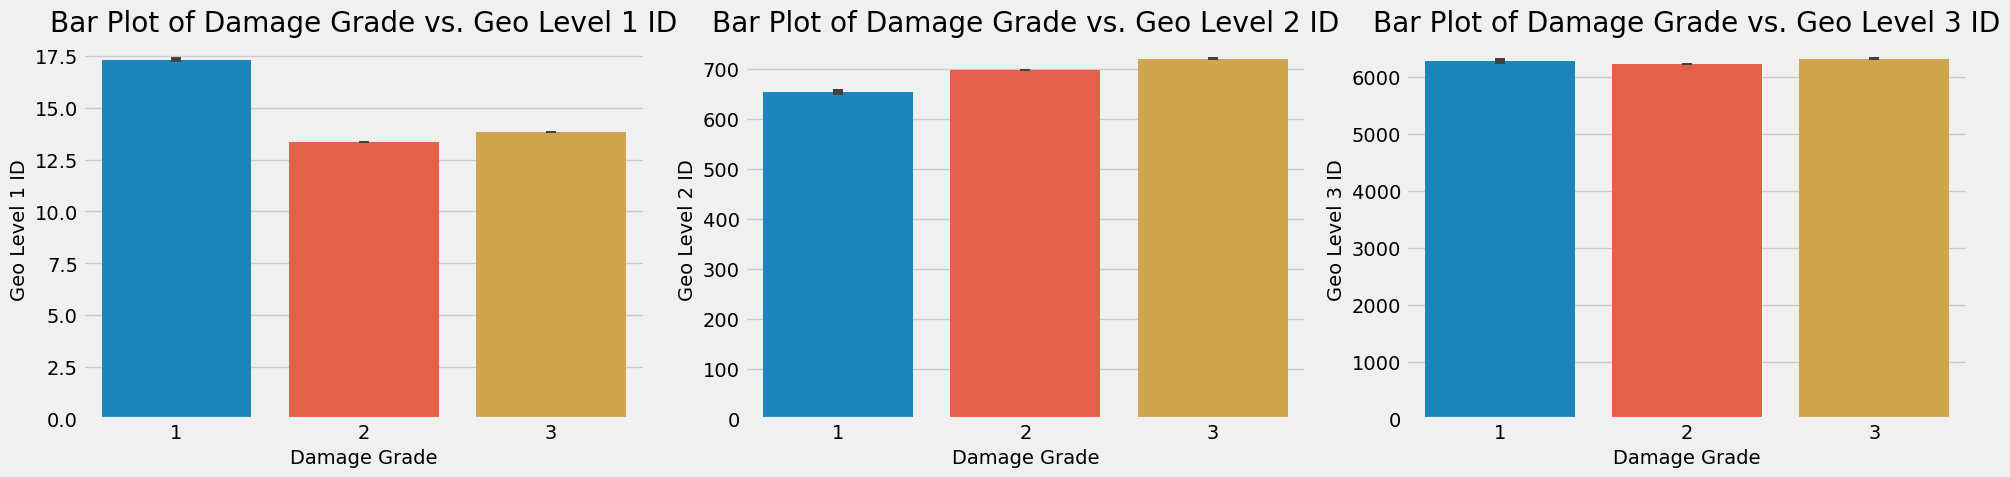

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))


plt.subplot(1, 3, 1)
sns.barplot(x='damage_grade', y='geo_level_1_id', data=new_data)
plt.xlabel('Damage Grade')
plt.ylabel('Geo Level 1 ID')
plt.title('Bar Plot of Damage Grade vs. Geo Level 1 ID')


plt.subplot(1, 3, 2)
sns.barplot(x='damage_grade', y='geo_level_2_id', data=new_data)
plt.xlabel('Damage Grade')
plt.ylabel('Geo Level 2 ID')
plt.title('Bar Plot of Damage Grade vs. Geo Level 2 ID')


plt.subplot(1, 3, 3)
sns.barplot(x='damage_grade', y='geo_level_3_id', data=new_data)
plt.xlabel('Damage Grade')
plt.ylabel('Geo Level 3 ID')
plt.title('Bar Plot of Damage Grade vs. Geo Level 3 ID')

plt.tight_layout()
plt.show()


# Feature Selection

In [59]:
new_data.nunique()

building_id                               260601
damage_grade                                   3
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_m

In [60]:
new_data.describe()

building_id   damage_grade  geo_level_1_id  geo_level_2_id  \
count  2.606010e+05  260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       2.238272       13.900353      701.074685   
std    3.045450e+05       0.611814        8.033617      412.710734   
min    4.000000e+00       1.000000        0.000000        0.000000   
25%    2.611900e+05       2.000000        7.000000      350.000000   
50%    5.257570e+05       2.000000       12.000000      702.000000   
75%    7.897620e+05       3.000000       21.000000     1050.000000   
max    1.052934e+06       3.000000       30.000000     1427.000000   

       geo_level_3_id  count_floors_pre_eq            age  area_percentage  \
count   260601.000000        260601.000000  260601.000000    260601.000000   
mean      6257.876148             2.129723      26.535029         8.018051   
std       3646.369645             0.727665      73.565937         4.392231   
min          0.000000             1.000000       0.000000         1.000000   
25%       3073.000000             2.000000      10.000000         5.000000   
50%       6270.000000             2.000000      15.000000         7.000000   
75%       9412.000000             2.000000      30.000000         9.000000   
max      12567.000000             9.000000     995.000000       100.000000   

       height_percentage  has_superstructure_adobe_mud  ...  \
count      260601.000000                 260601.000000  ...   
mean            5.434365                      0.088645  ...   
std             1.918418                      0.284231  ...   
min             2.000000                      0.000000  ...   
25%             4.000000                      0.000000  ...   
50%             5.000000                      0.000000  ...   
75%             6.000000                      0.000000  ...   
max            32.000000                      1.000000  ...   

       has_secondary_use_agriculture  has_secondary_use_hotel  \
count                  260601.000000            260601.000000   
mean                        0.064378                 0.033626   
std                         0.245426                 0.180265   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       has_secondary_use_rental  has_secondary_use_institution  \
count             260601.000000                  260601.000000   
mean                   0.008101                       0.000940   
std                    0.089638                       0.030647   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                    1.000000                       1.000000   

       has_secondary_use_school  has_secondary_use_industry  \
count             260601.000000               260601.000000   
mean                   0.000361                    0.001071   
std                    0.018989                    0.032703   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
max                    1.000000                    1.000000   

       has_secondary_use_health_post  has_secondary_use_gov_office  \
count                  260601.000000                 260601.000000   
mean                        0.000188                      0.000146   
std                         0.013711                      0.012075   
min                         0.000000                      0.000000   
25%    

In [61]:
new_data.corr()

building_id  damage_grade  \
building_id                                1.000000      0.001063   
damage_grade                               0.001063      1.000000   
geo_level_1_id                            -0.002850     -0.072347   
geo_level_2_id                             0.000347      0.043161   
geo_level_3_id                            -0.000393      0.007932   
count_floors_pre_eq                       -0.000654      0.122308   
age                                       -0.001476      0.029273   
area_percentage                           -0.002070     -0.125221   
height_percentage                          0.000096      0.048130   
has_superstructure_adobe_mud              -0.000307      0.055314   
has_superstructure_mud_mortar_stone        0.002423      0.291325   
has_superstructure_stone_flag              0.001443      0.066039   
has_superstructure_cement_mortar_stone    -0.000827     -0.060295   
has_superstructure_mud_mortar_brick       -0.003768      0.014561   
has_superstructure_cement_mortar_brick     0.001933     -0.254131   
has_superstructure_timber                  0.001967     -0.069852   
has_superstructure_bamboo                  0.001266     -0.063051   
has_superstructure_rc_non_engineered       0.002472     -0.158145   
has_superstructure_rc_engineered          -0.002259     -0.179014   
has_superstructure_other                   0.002171     -0.030224   
count_families                            -0.000599      0.056151   
has_secondary_use                          0.002606     -0.079630   
has_secondary_use_agriculture              0.002631      0.011309   
has_secondary_use_hotel                    0.001934     -0.097942   
has_secondary_use_rental                  -0.002152     -0.083754   
has_secondary_use_institution              0.000706     -0.028728   
has_secondary_use_school                  -0.000362     -0.011692   
has_secondary_use_industry                 0.002348     -0.011024   
has_secondary_use_health_post             -0.000374     -0.008543   
has_secondary_use_gov_office               0.000538     -0.009378   
has_secondary_use_use_police              -0.003116     -0.001656   
has_secondary_use_other                   -0.002295     -0.016334   

                                        geo_level_1_id  geo_level_2_id  \
building_id                                  -0.002850        0.000347   
damage_grade                                 -0.072347        0.043161   
geo_level_1_id                                1.000000       -0.061405   
geo_level_2_id                               -0.061405        1.000000   
geo_level_3_id                                0.002718        0.000921   
count_floors_pre_eq                          -0.089364        0.047730   
age                                          -0.003908        0.012594   
area_percentage                               0.071158       -0.049443   
height_percentage                            -0.063474        0.035516   
has_superstructure_adobe_mud                 -0.018245        0.015833   
has_superstructure_mud_mortar_stone          -0.152038        0.076491   
has_superstructure_stone_flag                 0.007677       -0.008743   
has_superstructure_cement_mortar_stone        0.023656       -0.009122   
has_superstructure_mud_mortar_brick          -0.028854        0.014246   
has_superstructure_cement_mortar_brick        0.134121       -0.079875   
has_superstructure_timber                     0.144985       -0.023927   
has_superstructure_bamboo                     0.074169       -0.032588   
has_superstructure_rc_non_engineered          0.016454       -0.038173   
has_superstructure_rc_engineered              0.015767       -0.036074   
has_superstructure_other                      0.022670       -0.020144   
count_families                                0.035108       -0.012439   
has_secondary_use                            -0.010428       -0.001519   
has_secondary_use_agriculture                -0.019786      

In [62]:
# Correlation analysis with target column
correlation_matrix = new_data.corr()
correlations_with_target = correlation_matrix['damage_grade'].sort_values(ascending=False)
print(correlations_with_target)

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.291325
count_floors_pre_eq                       0.122308
has_superstructure_stone_flag             0.066039
count_families                            0.056151
has_superstructure_adobe_mud              0.055314
height_percentage                         0.048130
geo_level_2_id                            0.043161
age                                       0.029273
has_superstructure_mud_mortar_brick       0.014561
has_secondary_use_agriculture             0.011309
geo_level_3_id                            0.007932
building_id                               0.001063
has_secondary_use_use_police             -0.001656
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_industry               -0.011024
has_secondary_use_school                 -0.011692
has_secondary_use_other                  -0.016334
has_secondary_use_institution  

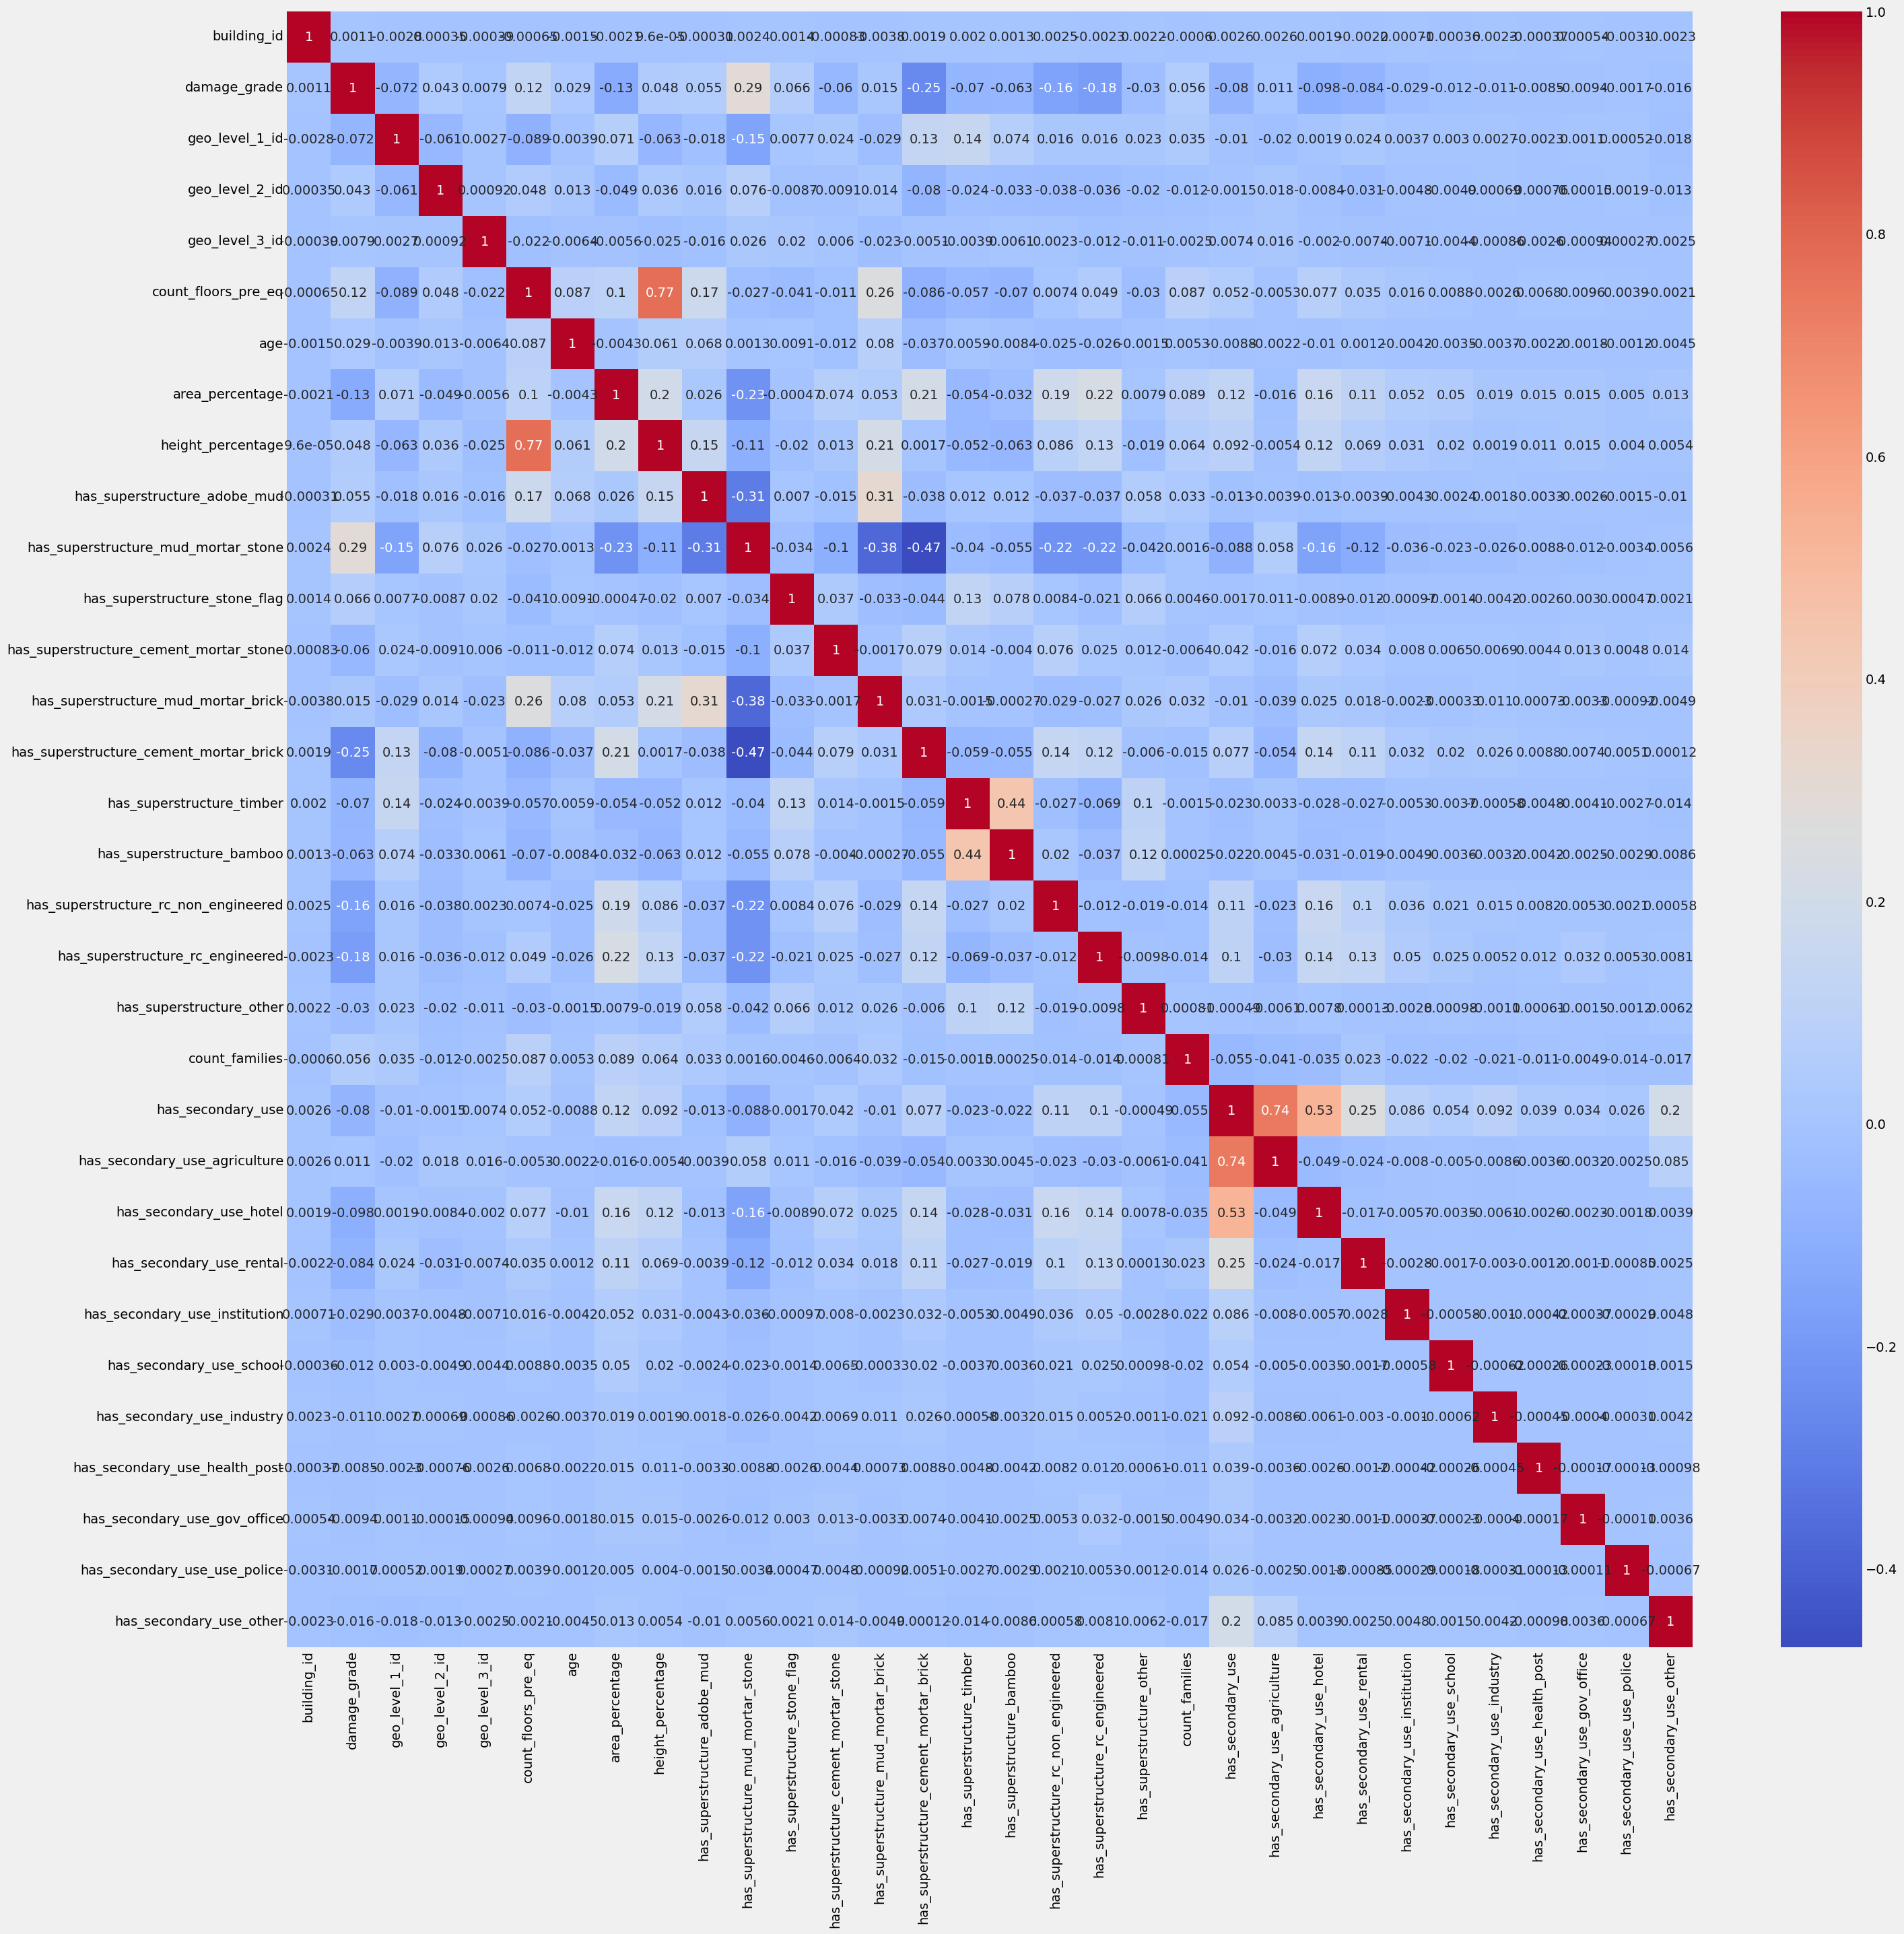

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(30, 30))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [64]:
def correlation(new_data,threshold):
    col_corr=set()  # creating empty set
    corr_matrix = new_data.corr().abs()
    for i in range (len(corr_matrix.columns)): #abs for absolute error
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname=corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [65]:
corr_feature=correlation(new_data,0.85)
len(set(corr_feature))

0

In [66]:
corr_feature

set()

# Insights:

Variance Threshold:
Variance Threshold is a simple filter method that removes features with low variance. It's particularly useful for datasets where features have similar scales and units.
Features with low variance indicate that they don't vary much across the dataset and may not contain much useful information for prediction.
By setting a threshold, you can remove features with variance below that threshold, keeping only those with higher variance.
This method is often applied to remove constant or near-constant features.

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_data['land_surface_condition']= le.fit_transform(new_data['land_surface_condition'])
new_data['foundation_type']       = le.fit_transform(new_data['foundation_type'])
new_data['roof_type']             = le.fit_transform(new_data['roof_type'])
new_data['ground_floor_type']     = le.fit_transform(new_data['ground_floor_type'])
new_data['other_floor_type']      = le.fit_transform(new_data['other_floor_type'])
new_data['position']              = le.fit_transform(new_data['position'])
new_data['plan_configuration']    = le.fit_transform(new_data['plan_configuration'])
new_data['legal_ownership_status']= le.fit_transform(new_data['legal_ownership_status'])


# Insights:

we have used label encoder for categorical columns to convert the categories so that our models will be understanding it better.

In [68]:
new_data['land_surface_condition'].value_counts()  

2    216757
0     35528
1      8316
Name: land_surface_condition, dtype: int64

In [69]:
new_data['roof_type'].value_counts()  

0    182842
1     61576
2     16183
Name: roof_type, dtype: int64

In [70]:
new_data.columns

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has

In [71]:
Damage_geo1=new_data.groupby(['geo_level_1_id','damage_grade', 'age','ground_floor_type']).size().reset_index(name='Buildings')

In [72]:
Damage_geo1

geo_level_1_id  damage_grade  age  ground_floor_type  Buildings
0                  0             1    0                  0         12
1                  0             1    0                  2          8
2                  0             1    0                  3          3
3                  0             1    5                  0         20
4                  0             1    5                  1          1
...              ...           ...  ...                ...        ...
4301              30             3   70                  0          3
4302              30             3   80                  0          1
4303              30             3   85                  0          1
4304              30             3   90                  0          1
4305              30             3  995                  0          2

[4306 rows x 5 columns]

In [73]:
Damage_geo1.loc[(Damage_geo1['ground_floor_type'] ==1) & (Damage_geo1['age'] > 5)].shape

(192, 5)

In [74]:
Damage_geo1.loc[(Damage_geo1['ground_floor_type'] ==0) & (Damage_geo1['age'] > 5)].shape

(1666, 5)

In [75]:
Damage_geo1.loc[(Damage_geo1['ground_floor_type'] ==2) & (Damage_geo1['age'] > 5)].shape

(603, 5)

In [76]:
Damage_geo1.loc[(Damage_geo1['ground_floor_type'] ==3) & (Damage_geo1['age'] > 5)].shape

(1036, 5)

# Insights:

We can see that the ground_floor type =0 and the building having age > 5 will has more chances of damages

In [77]:
Damage_geo2 =new_data.groupby(['geo_level_2_id','damage_grade','land_surface_condition','count_floors_pre_eq']).size().reset_index(name='count')


In [78]:
Damage_geo2


geo_level_2_id  damage_grade  land_surface_condition  \
0                   0             2                       2   
1                   0             2                       2   
2                   0             2                       2   
3                   0             3                       0   
4                   0             3                       2   
...               ...           ...                     ...   
13869            1427             2                       0   
13870            1427             3                       0   
13871            1427             3                       0   
13872            1427             3                       1   
13873            1427             3                       1   

       count_floors_pre_eq  count  
0                        1      3  
1                        2      5  
2                        4      1  
3                        2      1  
4                        1      8  
...                    ...    ...  
13869                    2      1  
13870                    1      1  
13871                    2      1  
13872                    1      1  
13873                    2      2  

[13874 rows x 5 columns]

In [79]:
Damage_geo2.loc[(Damage_geo2['count_floors_pre_eq'] ==1) & (Damage_geo2['land_surface_condition'] == 1)].shape

(452, 5)

In [80]:
Damage_geo2.loc[(Damage_geo2['count_floors_pre_eq'] ==2) & (Damage_geo2['land_surface_condition'] == 0)].shape

(1856, 5)

In [81]:
Damage_geo2.loc[(Damage_geo2['count_floors_pre_eq'] ==1) & (Damage_geo2['land_surface_condition'] == 2)].shape

(2544, 5)

In [82]:
Damage_geo3 =new_data.groupby(['geo_level_3_id','damage_grade','age','height_percentage']).size().reset_index(name='count')


In [83]:
Damage_geo3

geo_level_3_id  damage_grade  age  height_percentage  count
0                    0             3   15                  4      1
1                    0             3   25                  4      1
2                    1             1   10                  7      1
3                    1             2   20                  7      1
4                    1             3    5                  3      1
...                ...           ...  ...                ...    ...
156689           12565             1   15                  5      1
156690           12565             1   20                  5      3
156691           12565             1   30                  5      1
156692           12565             2   20                  5      2
156693           12567             2   45                  6      1

[156694 rows x 5 columns]

In [84]:
Damage_geo3.loc[(Damage_geo3['age'] > 20) & (Damage_geo3['height_percentage'] > 5 )].shape

(31424, 5)

In [85]:
Damage_geo3.loc[(Damage_geo3['age'] > 30) & (Damage_geo3['height_percentage'] > 10 )].shape

(822, 5)

In [86]:
Damage_geo3.loc[(Damage_geo3['age'] > 5) & (Damage_geo3['height_percentage'] > 2 )].shape

(118557, 5)

In [87]:
Damage_geo3.loc[(Damage_geo3['age'] > 10 ) & (Damage_geo3['height_percentage'] > 20 )].shape

(33, 5)

In [88]:
Damage_geo1.shape

(4306, 5)

In [89]:
Damage_geo2.shape

(13874, 5)

In [90]:
Damage_geo3.shape

(156694, 5)

# Insights: 

we can see that Damage_grade for geo_level_3 has more damage as compared to other levels

# Data preprocessing

In [91]:
new_data.isnull().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

# Insights:

we have found that there were no missing values.

In [92]:
new_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
260596    False
260597    False
260598    False
260599    False
260600    False
Length: 260601, dtype: bool

# Insights:

We have found that there were no duplicated values.

<Axes: xlabel='count_floors_pre_eq'>

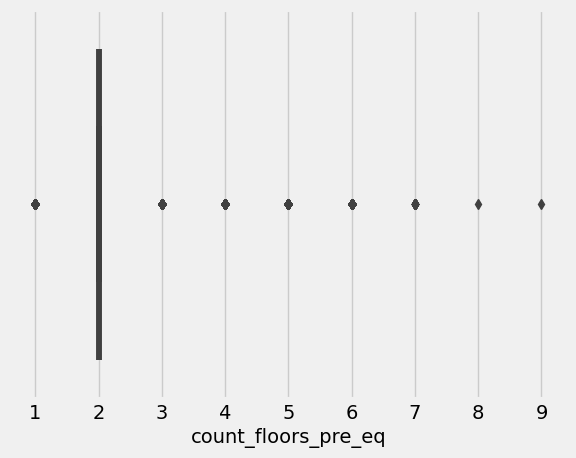

In [93]:
## Checking the outliers
sns.boxplot(x=new_data.count_floors_pre_eq ,orient='h')

<Axes: xlabel='age'>

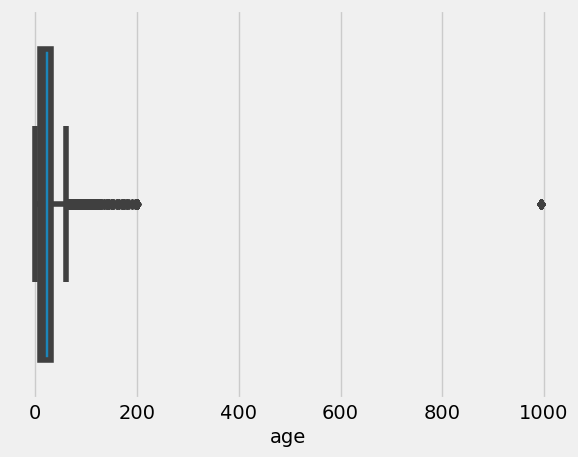

In [94]:
sns.boxplot(x=new_data.age)

<Axes: xlabel='area_percentage'>

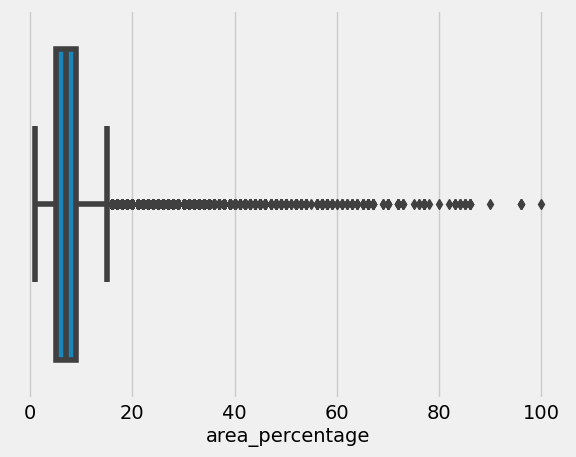

In [95]:
sns.boxplot(x=new_data.area_percentage)

<Axes: xlabel='height_percentage'>

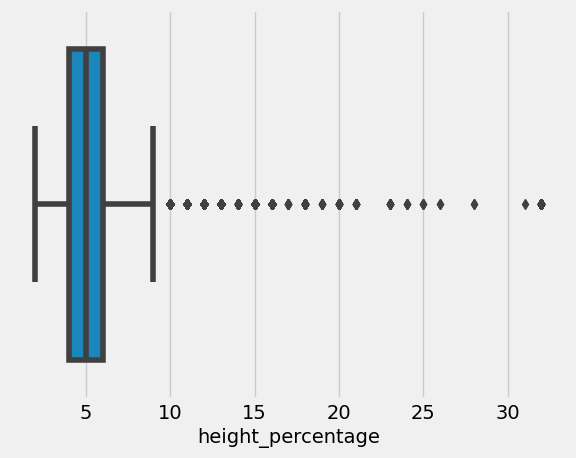

In [96]:
sns.boxplot(x=new_data.height_percentage)

# Using Winsorization method to handle Outliers

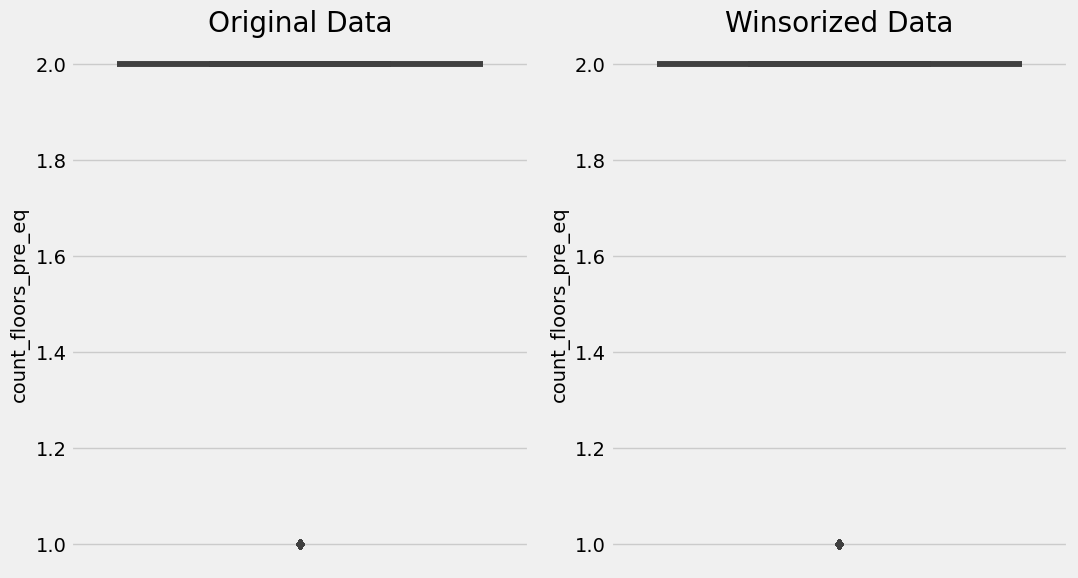

In [97]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

new_data['count_floors_pre_eq'] = winsorize(new_data['count_floors_pre_eq'], limits=[0.06, 0.6])

plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=new_data['count_floors_pre_eq'])
plt.title("Original Data")

plt.subplot(1, 2, 2)
sns.boxplot(y=new_data['count_floors_pre_eq'])
plt.title("Winsorized Data")

plt.tight_layout()
plt.show()

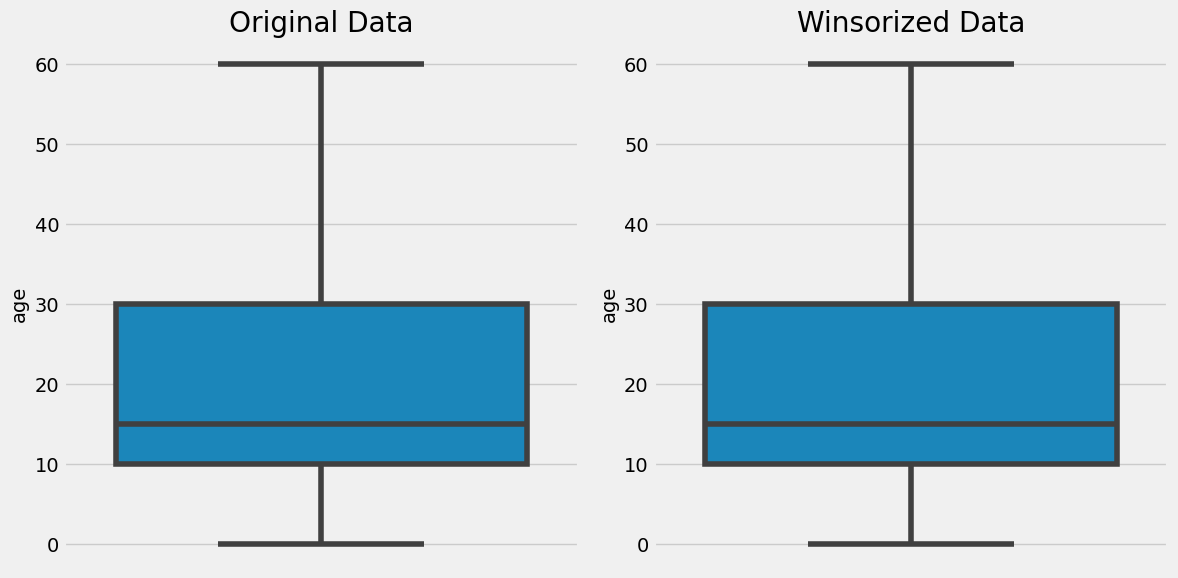

In [98]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

new_data['age'] = winsorize(new_data['age'], limits=[0., 0.05])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=new_data['age'])
plt.title("Original Data")

plt.subplot(1, 2, 2)
sns.boxplot(y=new_data['age'])
plt.title("Winsorized Data")

plt.tight_layout()
plt.show()

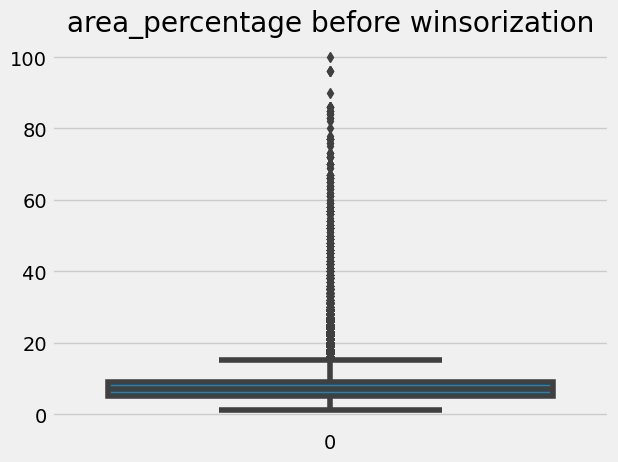

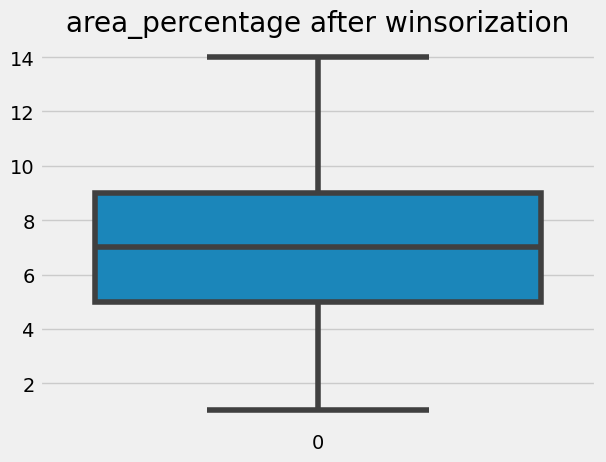

In [99]:
name='area_percentage'
data = new_data[name]

from scipy.stats.mstats import winsorize

name='area_percentage'
data = new_data[name]

sns.boxplot(data)
plt.title("{} before winsorization".format(name))
plt.show()

# winsorization
winsorized_data = winsorize(data,(0,0.08))


sns.boxplot(winsorized_data)
plt.title("{} after winsorization".format(name))
plt.show()

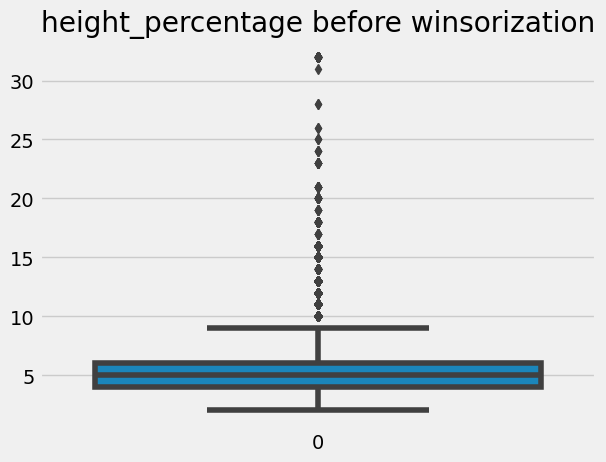

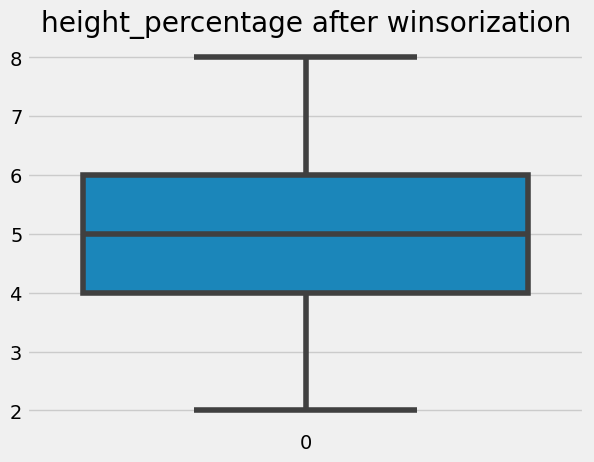

In [100]:
name='height_percentage'
data = new_data[name]

from scipy.stats.mstats import winsorize

name='height_percentage'
data = new_data[name]

sns.boxplot(data)
plt.title("{} before winsorization".format(name))
plt.show()

# winsorization
winsorized_data = winsorize(data,(0,0.08))


sns.boxplot(winsorized_data)
plt.title("{} after winsorization".format(name))
plt.show()

# Selecting Features:

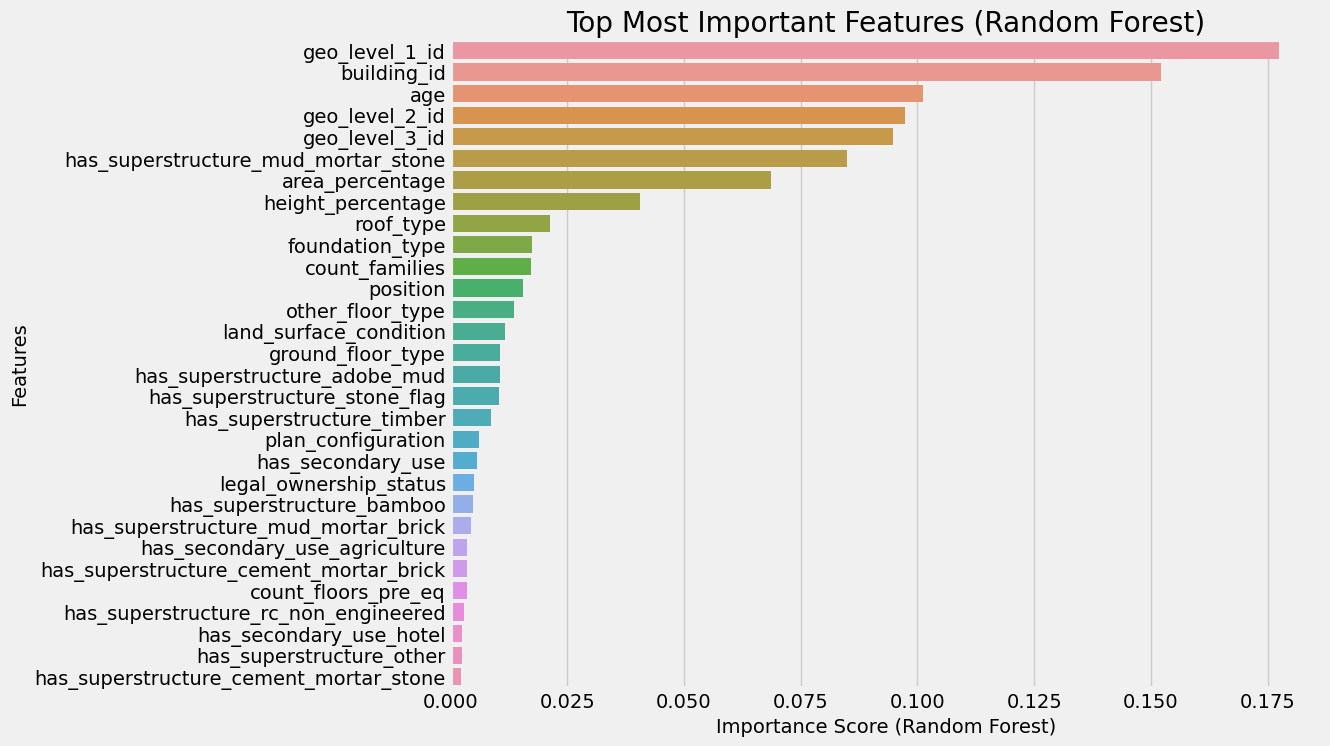

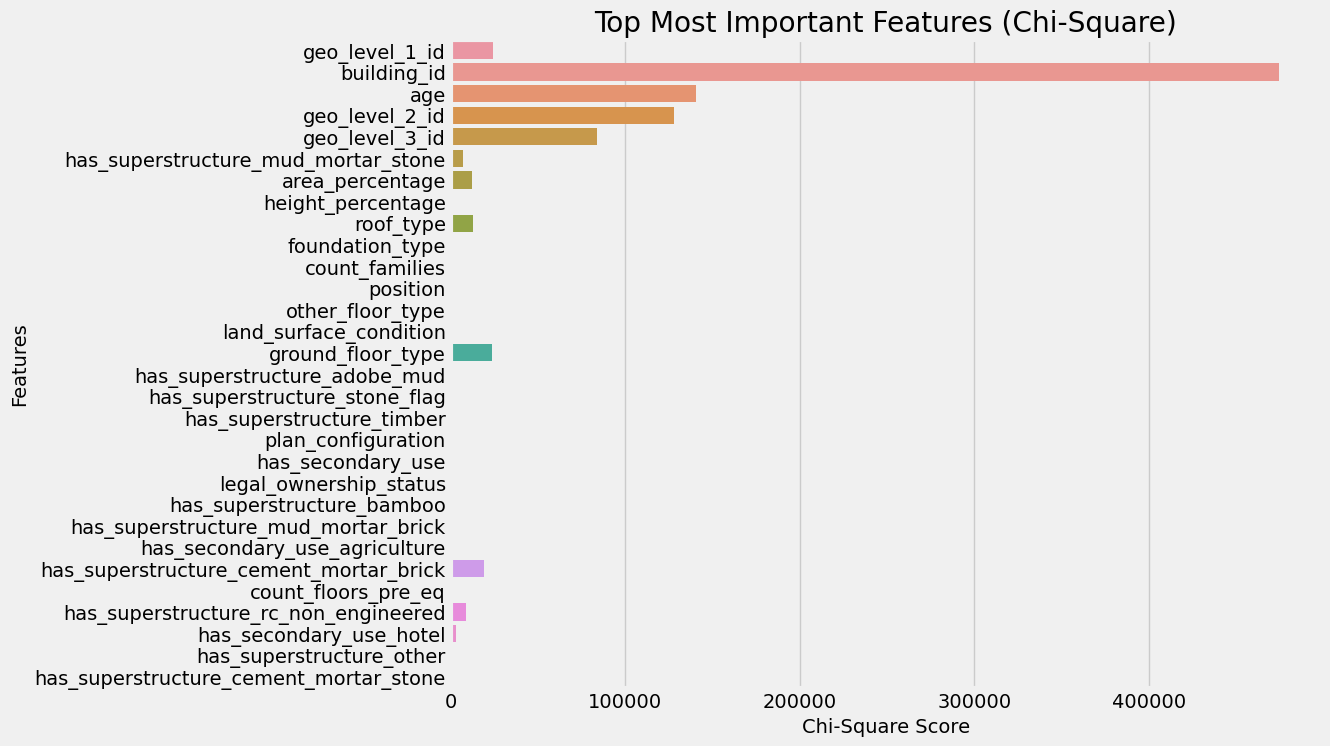

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestclassifier
from sklearn.feature_selection import SelectKBest, chi2

# Load your data into a Pandas DataFrame
X=new_data.drop(['damage_grade'],axis=1)
Y=new_data['damage_grade']

# Train your Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, Y)

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame of feature importances
feat_imp_rf = pd.DataFrame({'feature': X.columns, 'importance_rf': importances})

# Sort the DataFrame by feature importance score
feat_imp_rf = feat_imp_rf.sort_values('importance_rf', ascending=False).reset_index(drop=True)

# Use chi-squared feature selection
# Make sure your target variable (Y) is categorical for chi-squared test
X_chi2 = SelectKBest(score_func=chi2, k='all').fit(X, Y)
scores_chi2 = X_chi2.scores_

# Create a DataFrame of chi-squared scores
feat_imp_chi2 = pd.DataFrame({'feature': X.columns, 'chi2_score': scores_chi2})

# Sort the DataFrame by chi-squared score
feat_imp_chi2 = feat_imp_chi2.sort_values('chi2_score', ascending=False).reset_index(drop=True)

# Merge both feature importance DataFrames
feat_imp_combined = pd.merge(feat_imp_rf, feat_imp_chi2, on='feature')

# Visualize the top features based on importance scores
plt.figure(figsize=(10, 8))
sns.barplot(x='importance_rf', y='feature', data=feat_imp_combined.head(32))
plt.title('Top Most Important Features (Random Forest)')
plt.xlabel('Importance Score (Random Forest)')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='chi2_score', y='feature', data=feat_imp_combined.head(32))
plt.title('Top Most Important Features (Chi-Square)')
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.show()


# Insights:

RandomForestClassifier for Feature Importance:
Random Forest is an ensemble learning algorithm that can be used to calculate feature importance scores.
The algorithm measures the impact of each feature on the model's performance by looking at how much it decreases the impurity (e.g., Gini impurity) when splitting nodes in the trees.
Features with higher importance scores are considered more relevant for the prediction task.
This method is applicable to both classification and regression tasks and is especially useful when the relationship between features and the target is complex or nonlinear.

# Insights:

Chi-Square Test:
The Chi-Square test (χ² test) is used for feature selection when you have categorical features and a categorical target variable (classification tasks).
It measures the dependency between a categorical feature and the categorical target variable.
Features with high chi-squared scores have a significant relationship with the target variable and are considered important.
It's a common method for feature selection in classification tasks with categorical data.

# Insights:
 we have used this filter method for our models :
        - Variance Thershold
        - corelation pearson
        - chi square test 
        - RandomForestClassifier for feature importance

In [162]:
# Calculate feature ranks using chi-squared scores
features_rank = pd.DataFrame({'Features': X.columns, 'Score': scores_chi2})

# Display the top-ranked features
top_features_chi2 = features_rank.nlargest(32, 'Score')  # Change 32 to your desired number of top features

# Print the top-ranked features
print("Top-ranked features based on Chi-Square scores:")
print(top_features_chi2)


Top-ranked features based on Chi-Square scores:
                                  Features          Score
0                              building_id  474738.213090
5                                      age  140676.510592
2                           geo_level_2_id  128238.967545
3                           geo_level_3_id   83664.759142
1                           geo_level_1_id   24186.950757
11                       ground_floor_type   23656.687098
20  has_superstructure_cement_mortar_brick   18949.414382
10                               roof_type   12976.397571
6                          area_percentage   11938.314628
23    has_superstructure_rc_non_engineered    8725.518483
16     has_superstructure_mud_mortar_stone    6969.601844
29                 has_secondary_use_hotel    2937.304376
27                       has_secondary_use    1485.663306
15            has_superstructure_adobe_mud    1340.145544
17           has_superstructure_stone_flag    1108.404575
19     has_superstructur

In [196]:
# Assuming you have calculated chi-squared scores and stored them in 'scores_chi2'

# Calculate feature ranks using chi-squared scores
features_rank = pd.DataFrame({'Features': X.columns, 'Score': scores_chi2})

# Display the top-ranked features
top_features_chi2 = features_rank.nlargest(15, 'Score')  # Change 15 to your desired number of top features

# Print the top-ranked features
print("Top-ranked features based on Chi-Square scores:")
print(top_features_chi2)

# Now, integrate the chi-squared scores into your existing code
dfscores = pd.DataFrame(scores_chi2, columns=["Score"])
dfcolumns = pd.DataFrame(X.columns)
features_rank = pd.concat([dfcolumns, dfscores], axis=1)
features_rank.columns = ['Features', 'Score']

# Print the top 32 features based on Chi-Square scores
top_features_chi2 = features_rank.nlargest(32, 'Score')
print("Top 32 features based on Chi-Square scores:")
print(top_features_chi2)

Top-ranked features based on Chi-Square scores:
                                  Features          Score
0                              building_id  474738.213090
5                                      age  140676.510592
2                           geo_level_2_id  128238.967545
3                           geo_level_3_id   83664.759142
1                           geo_level_1_id   24186.950757
11                       ground_floor_type   23656.687098
20  has_superstructure_cement_mortar_brick   18949.414382
10                               roof_type   12976.397571
6                          area_percentage   11938.314628
23    has_superstructure_rc_non_engineered    8725.518483
16     has_superstructure_mud_mortar_stone    6969.601844
29                 has_secondary_use_hotel    2937.304376
27                       has_secondary_use    1485.663306
15            has_superstructure_adobe_mud    1340.145544
17           has_superstructure_stone_flag    1108.404575
Top 32 features based on

In [206]:
dfscores=pd.DataFrame(scores_chi2,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank
features_rank.nlargest(32,'Score')

Features          Score
0                              building_id  474738.213090
5                                      age  140676.510592
2                           geo_level_2_id  128238.967545
3                           geo_level_3_id   83664.759142
1                           geo_level_1_id   24186.950757
11                       ground_floor_type   23656.687098
20  has_superstructure_cement_mortar_brick   18949.414382
10                               roof_type   12976.397571
6                          area_percentage   11938.314628
23    has_superstructure_rc_non_engineered    8725.518483
16     has_superstructure_mud_mortar_stone    6969.601844
29                 has_secondary_use_hotel    2937.304376
27                       has_secondary_use    1485.663306
15            has_superstructure_adobe_mud    1340.145544
17           has_superstructure_stone_flag    1108.404575
19     has_superstructure_mud_mortar_brick     987.065751
22               has_superstructure_bamboo     981.491828
21               has_superstructure_timber     977.290073
18  has_superstructure_cement_mortar_stone     936.793309
4                      count_floors_pre_eq     623.340619
28           has_secondary_use_agriculture     540.461154
7                        height_percentage     499.970897
9                          foundation_type     420.333678
14                      plan_configuration     378.257508
24                has_superstructure_other     279.470979
12                        other_floor_type     260.579525
26                          count_families     168.949183
13                                position     149.771597
25                  legal_ownership_status     121.306115
8                   land_surface_condition     115.744982

In [208]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features=SelectKBest(score_func=chi2,k=30)
ordered_feature=ordered_rank_features.fit(X,Y)

In [209]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank
features_rank.nlargest(32,'Score')

Features          Score
0                              building_id  474738.213090
5                                      age  140676.510592
2                           geo_level_2_id  128238.967545
3                           geo_level_3_id   83664.759142
1                           geo_level_1_id   24186.950757
11                       ground_floor_type   23656.687098
20  has_superstructure_cement_mortar_brick   18949.414382
10                               roof_type   12976.397571
6                          area_percentage   11938.314628
23    has_superstructure_rc_non_engineered    8725.518483
16     has_superstructure_mud_mortar_stone    6969.601844
29                 has_secondary_use_hotel    2937.304376
27                       has_secondary_use    1485.663306
15            has_superstructure_adobe_mud    1340.145544
17           has_superstructure_stone_flag    1108.404575
19     has_superstructure_mud_mortar_brick     987.065751
22               has_superstructure_bamboo     981.491828
21               has_superstructure_timber     977.290073
18  has_superstructure_cement_mortar_stone     936.793309
4                      count_floors_pre_eq     623.340619
28           has_secondary_use_agriculture     540.461154
7                        height_percentage     499.970897
9                          foundation_type     420.333678
14                      plan_configuration     378.257508
24                has_superstructure_other     279.470979
12                        other_floor_type     260.579525
26                          count_families     168.949183
13                                position     149.771597
25                  legal_ownership_status     121.306115
8                   land_surface_condition     115.744982

In [210]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [211]:
features_rank.columns=['Features','Score']
features_rank

Features          Score
0                              building_id  474738.213090
1                           geo_level_1_id   24186.950757
2                           geo_level_2_id  128238.967545
3                           geo_level_3_id   83664.759142
4                      count_floors_pre_eq     623.340619
5                                      age  140676.510592
6                          area_percentage   11938.314628
7                        height_percentage     499.970897
8                   land_surface_condition     115.744982
9                          foundation_type     420.333678
10                               roof_type   12976.397571
11                       ground_floor_type   23656.687098
12                        other_floor_type     260.579525
13                                position     149.771597
14                      plan_configuration     378.257508
15            has_superstructure_adobe_mud    1340.145544
16     has_superstructure_mud_mortar_stone    6969.601844
17           has_superstructure_stone_flag    1108.404575
18  has_superstructure_cement_mortar_stone     936.793309
19     has_superstructure_mud_mortar_brick     987.065751
20  has_superstructure_cement_mortar_brick   18949.414382
21               has_superstructure_timber     977.290073
22               has_superstructure_bamboo     981.491828
23    has_superstructure_rc_non_engineered    8725.518483
24                has_superstructure_other     279.470979
25                  legal_ownership_status     121.306115
26                          count_families     168.949183
27                       has_secondary_use    1485.663306
28           has_secondary_use_agriculture     540.461154
29                 has_secondary_use_hotel    2937.304376

In [212]:
features_rank.nlargest(32,'Score')

Features          Score
0                              building_id  474738.213090
5                                      age  140676.510592
2                           geo_level_2_id  128238.967545
3                           geo_level_3_id   83664.759142
1                           geo_level_1_id   24186.950757
11                       ground_floor_type   23656.687098
20  has_superstructure_cement_mortar_brick   18949.414382
10                               roof_type   12976.397571
6                          area_percentage   11938.314628
23    has_superstructure_rc_non_engineered    8725.518483
16     has_superstructure_mud_mortar_stone    6969.601844
29                 has_secondary_use_hotel    2937.304376
27                       has_secondary_use    1485.663306
15            has_superstructure_adobe_mud    1340.145544
17           has_superstructure_stone_flag    1108.404575
19     has_superstructure_mud_mortar_brick     987.065751
22               has_superstructure_bamboo     981.491828
21               has_superstructure_timber     977.290073
18  has_superstructure_cement_mortar_stone     936.793309
4                      count_floors_pre_eq     623.340619
28           has_secondary_use_agriculture     540.461154
7                        height_percentage     499.970897
9                          foundation_type     420.333678
14                      plan_configuration     378.257508
24                has_superstructure_other     279.470979
12                        other_floor_type     260.579525
26                          count_families     168.949183
13                                position     149.771597
25                  legal_ownership_status     121.306115
8                   land_surface_condition     115.744982

In [213]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [214]:
print(model.feature_importances_)

[0.1388821  0.12754239 0.1073405  0.11130063 0.00497839 0.09118523
 0.10411824 0.06679472 0.01680333 0.01950462 0.02252218 0.01680656
 0.01454702 0.02287261 0.01011728 0.00852773 0.01789457 0.00597304
 0.00354713 0.00671242 0.0107522  0.0092342  0.00581411 0.00572466
 0.00352165 0.00859837 0.02653849 0.00560422 0.00307597 0.00316544]


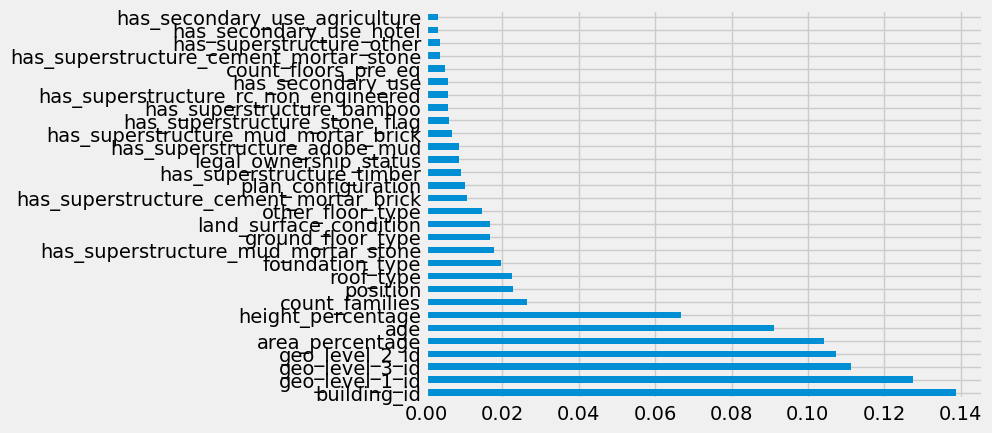

In [230]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(38).plot(kind='barh')
plt.show()

In [102]:
new_data.drop(['has_superstructure_rc_engineered','has_secondary_use_rental',
               'has_secondary_use_other','has_secondary_use_industry',
               'has_secondary_use_institution','has_secondary_use_school',
               'has_secondary_use_health_post','has_secondary_use_use_police',
               'has_secondary_use_gov_office'],axis=1,inplace=True)


# Insights:

As we can see, the most important variables to predict the damage grade of a house are the different geo-locations. This makes sense, since the level of destruction of one house is likely to be correlated with the average damage of the houses around.

The feature importance also shows that nearly all binary variables have a low feature importance, meaning they are providing the model with little to no predictive information. 

As can be seen above, nearly all binary features have a mean below ten percent. 

That implies that most rows are equal to zero. 

Furthermore, it is visible that the binary variables with an average above ten percent have also a higher feature importance within our prediction model. 

So we are dropping 9 features.

In [103]:
# split data into x and y
X=new_data.drop(['damage_grade'],axis=1)
Y=new_data['damage_grade']


In [104]:
# split data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=2)

In [262]:
from sklearn.preprocessing import MaxAbsScaler
scaler= MaxAbsScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)

In [263]:
X_train.shape

(182420, 30)

In [264]:
Y_train.shape

(182420,)

In [265]:
X_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
120180      1020784              22            1152           11726   
106650       632925              22             631            8627   
209277       756851              15            1105            6848   
101739       167993               6             981            9951   
112829       130871              13            1262           12264   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
120180                    2    0                9                  5   
106650                    1   25                7                  3   
209277                    2   30                8                  5   
101739                    2   20                9                  7   
112829                    2    5                7                  5   

        land_surface_condition  foundation_type  ...  \
120180                       2                1  ...   
106650                       0                2  ...   
209277                       2                2  ...   
101739                       2                2  ...   
112829                       2                2  ...   

        has_superstructure_cement_mortar_brick  has_superstructure_timber  \
120180                                       0                          0   
106650                                       0                          0   
209277                                       0                          0   
101739                                       0                          0   
112829                                       0                          0   

        has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
120180                          0                                     0   
106650                          1                                     0   
209277                          0                                     0   
101739                          0                                     0   
112829                          0                                     0   

        has_superstructure_other  legal_ownership_status  count_families  \
120180                         0                       2               1   
106650                         0                       2               1   
209277                         0                       2               1   
101739                         0                       2               1   
112829                         0                       2               1   

        has_secondary_use  has_secondary_use_agriculture  \
120180                  0                              0   
106650                  0                              0   
209277                  0                              0   
101739                  0                              0   
112829                  0                              0   

        has_secondary_use_hotel  
120180                        0  
106650                        0  
209277                        0  
101739                        0  
112829                        0  

[5 rows x 30 columns]

In [108]:
Y_test.shape

(78181,)

In [109]:
X_test.shape

(78181, 30)

In [110]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=19).fit(X_train, Y_train)

#display selected feature names

X_train.columns[sel.get_support()]

Index(['geo_level_1_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'foundation_type', 'roof_type', 'ground_floor_type',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_hotel'],
      dtype='object')

# Smoting

In [111]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
Y_smote.value_counts()

1    103847
2    103847
3    103847
Name: damage_grade, dtype: int64

# Insights for using ROC Curve for all models:

The Receiver Operating Characteristic (ROC) curve is a valuable tool in the field of machine learning and statistics, primarily used in binary and multiclass classification problems. Its importance lies in its ability to provide insights into the performance of classification models and their ability to discriminate between classes

# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


In [113]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [114]:
y_p_test=LR.predict(X_test)

In [115]:
# Evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [116]:
Confusion=confusion_matrix(Y_test,y_p_test)
Confusion

array([[    0,  7532,     0],
       [    0, 44412,     0],
       [    0, 26237,     0]], dtype=int64)

In [117]:
accuracy_score(Y_test,y_p_test)

0.568066409997314

In [283]:
precision_score(Y_test,y_p_test,average='weighted')

0.32269944616723634

In [284]:
recall_score(Y_test,y_p_test,average='weighted')

0.568066409997314

In [285]:
f1_score(Y_test,y_p_test,average='weighted')

0.41158900427921186

In [121]:
print(classification_report(Y_test,y_p_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7532
           2       0.57      1.00      0.72     44412
           3       0.00      0.00      0.00     26237

    accuracy                           0.57     78181
   macro avg       0.19      0.33      0.24     78181
weighted avg       0.32      0.57      0.41     78181



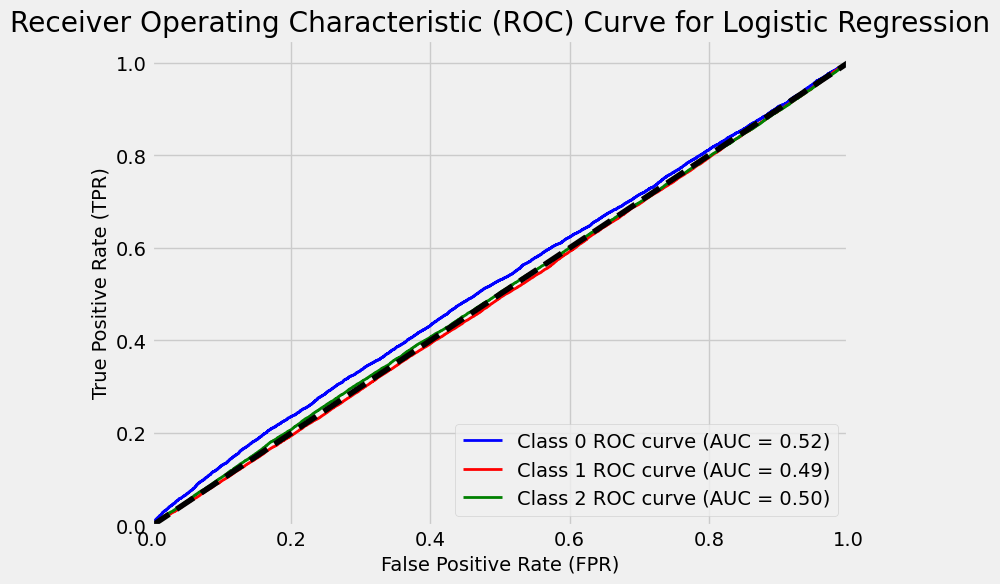

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Fit the logistic regression model to your training data
LR.fit(X_train, Y_train)

# Binarize the true labels for multiclass classification
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))

# Make predictions on test data
y_test_pred = LR.predict_proba(X_test)

# Initialize variables to store ROC curve information
n_classes = len(np.unique(Y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])  # You can extend this list for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [123]:
dt=DecisionTreeClassifier()

In [124]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [125]:
dt_p_test=dt.predict(X_test)

In [126]:
Confusion=confusion_matrix(Y_test,dt_p_test)
Confusion

array([[ 3510,  3479,   543],
       [ 3599, 30689, 10124],
       [  566,  9744, 15927]], dtype=int64)

In [127]:
accuracy_score(Y_test,dt_p_test)

0.6411532213709213

In [286]:
precision_score(Y_test,dt_p_test,average='weighted')

0.6949644017384772

In [287]:
recall_score(Y_test,dt_p_test,average='weighted')

0.6989421982323071

In [288]:
f1_score(Y_test,dt_p_test,average='weighted')

0.693620089671584

In [131]:
print(classification_report(Y_test,dt_p_test))

              precision    recall  f1-score   support

           1       0.46      0.47      0.46      7532
           2       0.70      0.69      0.69     44412
           3       0.60      0.61      0.60     26237

    accuracy                           0.64     78181
   macro avg       0.59      0.59      0.59     78181
weighted avg       0.64      0.64      0.64     78181



# Hyperparameter of Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_dist = {
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}


In [155]:
# Create a Decision Tree Classifier
dt= DecisionTreeClassifier()


In [157]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)


In [158]:
# Fit the randomized search to your training data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a Decision Tree Classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)


In [159]:
# Fit the best classifier to your training data
best_dt_classifier.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=16, min_samples_leaf=10, min_samples_split=6,
                       random_state=42)

In [198]:
# Make predictions on your test data using the best classifier
dt_p_test = best_dt_classifier.predict(X_test)


In [199]:
Confusion=confusion_matrix(Y_test,dt_p_test)
Confusion

array([[ 3320,  4012,   200],
       [ 2173, 35491,  6748],
       [  237, 10167, 15833]], dtype=int64)

In [200]:
accuracy_score(Y_test,dt_p_test)

0.6989421982323071

In [289]:
precision_score(Y_test,dt_p_test,average='weighted')

0.6949644017384772

In [290]:
recall_score(Y_test,dt_p_test,average='weighted')

0.6989421982323071

In [291]:
f1_score(Y_test,dt_p_test,average='weighted')

0.693620089671584

In [204]:
print(classification_report(Y_test,dt_p_test))

              precision    recall  f1-score   support

           1       0.58      0.44      0.50      7532
           2       0.71      0.80      0.75     44412
           3       0.70      0.60      0.65     26237

    accuracy                           0.70     78181
   macro avg       0.66      0.61      0.63     78181
weighted avg       0.69      0.70      0.69     78181



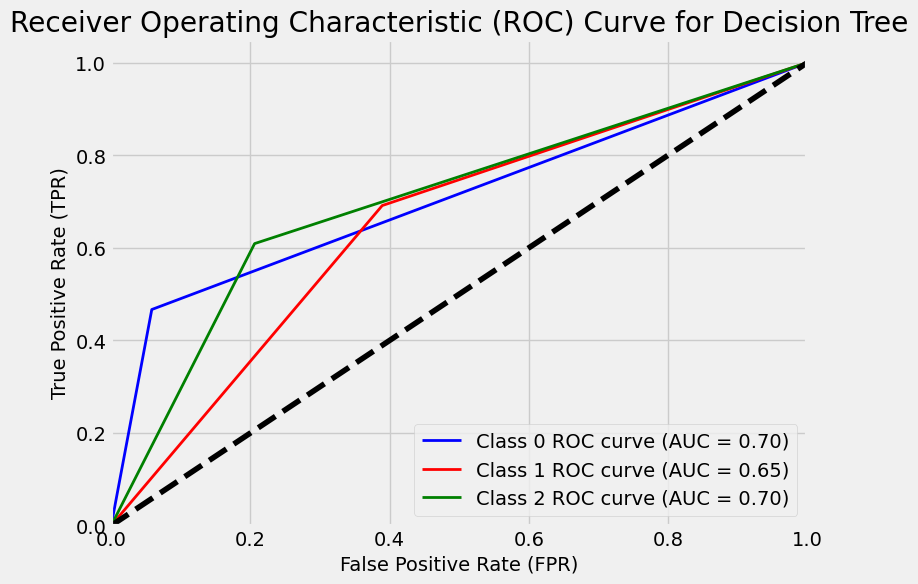

In [205]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Fit the decision tree model to your training data (replace best_model with your decision tree classifier)
dt.fit(X_train, Y_train)

# Binarize the true labels for multiclass classification
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))

# Make predictions on test data and obtain predicted probabilities
y_test_pred_proba = dt.predict_proba(X_test)

# Initialize variables to store ROC curve information
n_classes = len(np.unique(Y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_test_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])  # You can extend this list for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


# Random Forest

In [136]:
rf=RandomForestClassifier()

In [137]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [138]:
rf_p_test=rf.predict(X_test)

In [164]:
Confusion=confusion_matrix(Y_test,rf_p_test)
Confusion

array([[ 3325,  4063,   144],
       [ 1574, 37430,  5408],
       [  153, 10765, 15319]], dtype=int64)

In [165]:
accuracy_score(Y_test,rf_p_test)

0.7172330873230068

In [292]:
precision_score(Y_test,rf_p_test,average='weighted')

0.716607097339041

In [293]:
recall_score(Y_test,rf_p_test,average='weighted')

0.7172330873230068

In [294]:
f1_score(Y_test,rf_p_test,average='weighted')

0.7090766269620604

In [169]:
print(classification_report(Y_test,rf_p_test))

              precision    recall  f1-score   support

           1       0.66      0.44      0.53      7532
           2       0.72      0.84      0.77     44412
           3       0.73      0.58      0.65     26237

    accuracy                           0.72     78181
   macro avg       0.70      0.62      0.65     78181
weighted avg       0.72      0.72      0.71     78181



# Hyperparameter of Random Forest

In [181]:
param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'max_depth': [None, 10],              # Maximum depth of the trees
    'min_samples_split': [2, 5],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],          # Minimum number of samples required to be in a leaf node
    'bootstrap': [True, False]
}

In [182]:
rf_clf = RandomForestClassifier()

In [183]:
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [184]:
rf_cv.fit(X_train, Y_train)
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best paramters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True})


In [185]:
rf_clf1= RandomForestClassifier()

In [186]:
rf_clf1=RandomForestClassifier(**rf_best_params)

In [187]:
rf_clf1.fit(X_train,Y_train)

RandomForestClassifier()

In [188]:
rf1_p_test=rf_clf1.predict(X_test)

In [189]:
Confusion=confusion_matrix(Y_test,rf1_p_test)
Confusion

array([[ 3336,  4053,   143],
       [ 1552, 37471,  5389],
       [  147, 10683, 15407]], dtype=int64)

In [190]:
accuracy_score(Y_test,rf1_p_test)

0.719023803737481

In [281]:
precision_score(Y_test,rf1_p_test,average='weighted')

0.7184857135590228

In [280]:
recall_score(Y_test,rf1_p_test,average='weighted')

0.719023803737481

In [282]:
f1_score(Y_test,rf1_p_test,average='weighted')

0.7109658632507645

In [194]:
print(classification_report(Y_test,rf1_p_test))

              precision    recall  f1-score   support

           1       0.66      0.44      0.53      7532
           2       0.72      0.84      0.78     44412
           3       0.74      0.59      0.65     26237

    accuracy                           0.72     78181
   macro avg       0.71      0.62      0.65     78181
weighted avg       0.72      0.72      0.71     78181



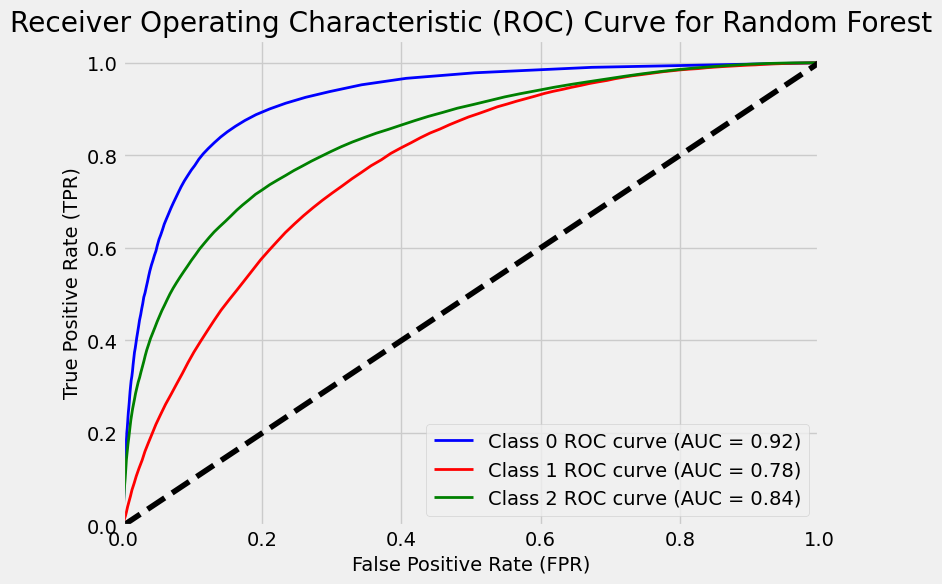

In [195]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Fit the logistic regression model to your training data
rf_clf1.fit(X_train, Y_train)

# Binarize the true labels for multiclass classification
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))

# Make predictions on test data
y_test_pred = rf_clf1.predict_proba(X_test)

# Initialize variables to store ROC curve information
n_classes = len(np.unique(Y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])  # You can extend this list for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


# Gradient Boosting

In [170]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [172]:
gb.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [173]:
gb_p_test = gb.predict(X_test)

In [174]:
Confusion=confusion_matrix(Y_test,gb_p_test)
Confusion

array([[ 2701,  4748,    83],
       [ 1554, 38400,  4458],
       [  111, 14142, 11984]], dtype=int64)

In [175]:
accuracy_score(Y_test,gb_p_test)

0.6790012918739847

In [295]:
precision_score(Y_test,gb_p_test,average='weighted')

0.6837341747455004

In [296]:
recall_score(Y_test,gb_p_test,average='weighted')

0.6790012918739847

In [297]:
f1_score(Y_test,gb_p_test,average='weighted')

0.6608140783054975

In [179]:
print(classification_report(Y_test,gb_p_test))

              precision    recall  f1-score   support

           1       0.62      0.36      0.45      7532
           2       0.67      0.86      0.76     44412
           3       0.73      0.46      0.56     26237

    accuracy                           0.68     78181
   macro avg       0.67      0.56      0.59     78181
weighted avg       0.68      0.68      0.66     78181



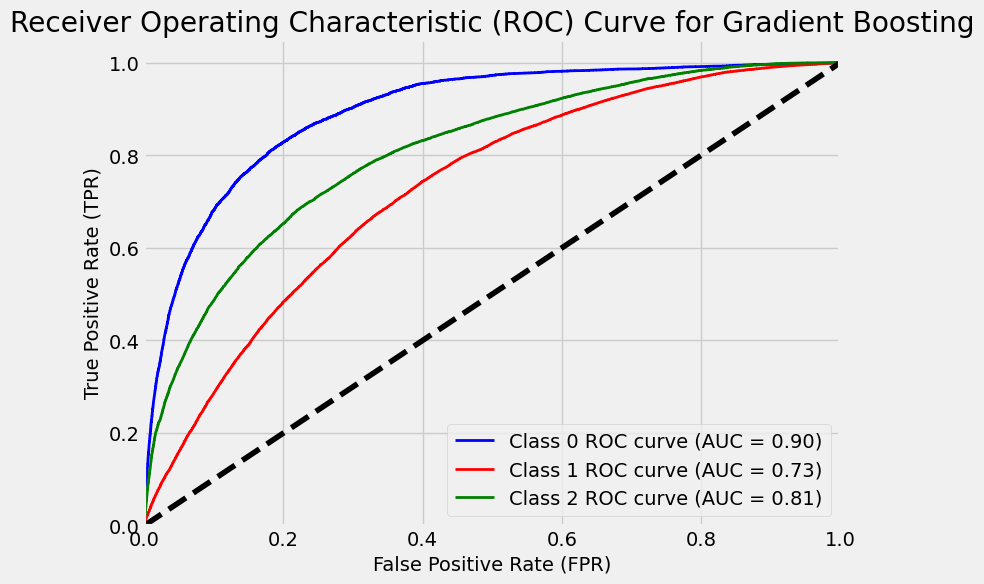

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Fit the logistic regression model to your training data
gb.fit(X_train, Y_train)

# Binarize the true labels for multiclass classification
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))

# Make predictions on test data
y_test_pred = gb.predict_proba(X_test)

# Initialize variables to store ROC curve information
n_classes = len(np.unique(Y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])  # You can extend this list for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


# Light Gradient Boosting

In [139]:
!pip install lightgbm

In [140]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
# Create an instance of the LGBMClassifier
clf = lgb.LGBMClassifier(
    boosting_type='gbdt',         # Gradient Boosting Decision Tree
    objective='multiclass',       # 'multiclass' for multiclass classification
    num_leaves=31,                # Maximum number of leaves in a tree
    learning_rate=0.05,           # Learning rate
    feature_fraction=0.9,         # Percentage of features used in each iteration
    random_state=42               # Seed for reproducibility
)


In [141]:
# Train the classifier on the training data
clf.fit(X_train, Y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 182420, number of used features: 30
[LightGBM] [Info] Start training from score -2.338867
[LightGBM] [Info] Start training from score -0.563393
[LightGBM] [Info] Start training from score -1.095749


LGBMClassifier(feature_fraction=0.9, learning_rate=0.05, objective='multiclass',
               random_state=42)

In [142]:
# Make predictions on the test data
y_pred = clf.predict(X_test)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [143]:
Confusion=confusion_matrix(Y_test,y_pred)
Confusion

array([[ 2989,  4463,    80],
       [ 1510, 37790,  5112],
       [  115, 12211, 13911]], dtype=int64)

In [144]:
accuracy_score(Y_test,y_pred)

0.6995305764827772

In [298]:
precision_score(Y_test,y_pred,average='weighted')

0.700947234626038

In [299]:
recall_score(Y_test,y_pred,average='weighted')

0.6995305764827772

In [300]:
f1_score(Y_test,y_pred,average='weighted')

0.6875721067041991

In [148]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.65      0.40      0.49      7532
           2       0.69      0.85      0.76     44412
           3       0.73      0.53      0.61     26237

    accuracy                           0.70     78181
   macro avg       0.69      0.59      0.62     78181
weighted avg       0.70      0.70      0.69     78181



[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 182420, number of used features: 30
[LightGBM] [Info] Start training from score -2.338867
[LightGBM] [Info] Start training from score -0.563393
[LightGBM] [Info] Start training from score -1.095749
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


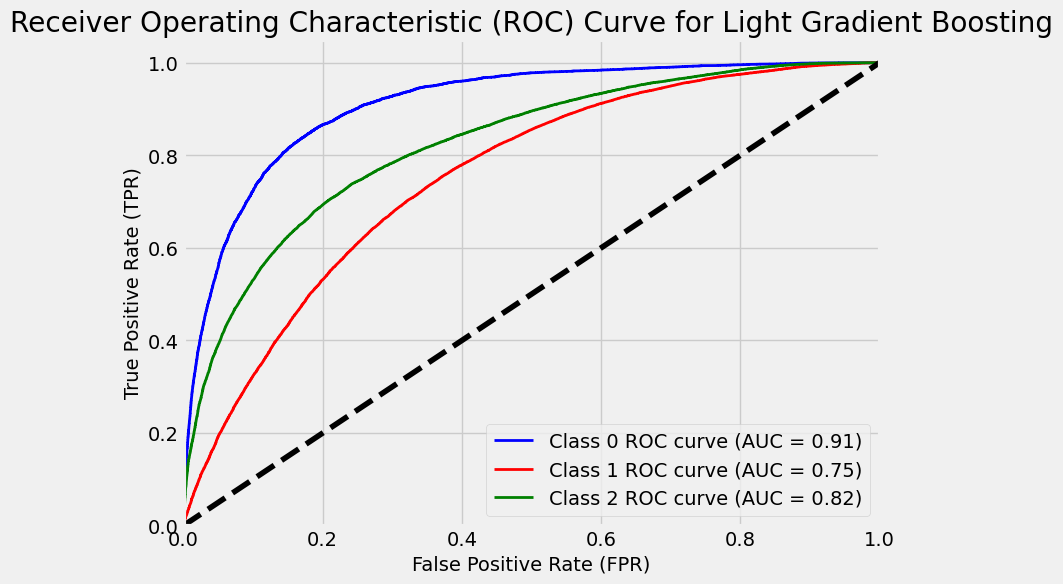

In [149]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Fit the logistic regression model to your training data
clf.fit(X_train, Y_train)

# Binarize the true labels for multiclass classification
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))

# Make predictions on test data
y_test_pred = clf.predict_proba(X_test)

# Initialize variables to store ROC curve information
n_classes = len(np.unique(Y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])  # You can extend this list for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Light Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


# Model Comparison Report

In [247]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier  # Add this import
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  # Assuming you meant XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Convert class labels to start from 0 and be consecutive integers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)


# Create a dictionary to store model names and corresponding model objects
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=None, random_state=42),
    'Random Forest': RandomForestClassifier(),
    'RandomForestCr': RandomForestClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=None, random_state=42),
    'GradientBoostingCl'  :  GradientBoostingClassifier(random_state=42)
}

# Define evaluation metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted'),
}

# Perform cross-validation and compare models using cross_validate
results = {}
for model_name, model in models.items():
    cv_results = cross_validate(model, X, Y_encoded, cv=5, scoring=scoring)
    results[model_name] = {
        metric: cv_results[f'test_{metric}'].mean() for metric in scoring
    }


In [248]:
# Display the comparison results
Models_df = pd.DataFrame(results).T
print(Models_df)


                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.568912   0.323661  0.568912  0.412593
Decision Tree           0.645328   0.646478  0.645328  0.645854
Random Forest           0.723343   0.722657  0.723343  0.715970
RandomForestCr          0.723316   0.722686  0.723316  0.716014
DecisionTreeClassifier  0.645328   0.646478  0.645328  0.645854
GradientBoostingCl      0.682315   0.685985  0.682315  0.665523


# Insights for Model Comparison:

Evaluating Model Performance,
Threshold SelectionComparing Models,
Model Robustness,
Area Under the ROC Curve (AUC),
Interpreting Model Biases,
Visualizing Classifier Performance

# Risk Analysis:

This risk analysis report outlines the key observations and findings from the analysis of a multi-class classification dataset. The report covers various aspects of data preprocessing, feature selection, modeling, and performance evaluation. 

It concludes with recommendations for potential improvements. Dataset Overview 1.Multi-Class Classification: The dataset under analysis is a multi-class classification problem,
where the goal is to predict 'damage_grade' based on various features. 


2.Data Sources: The dataset consists of two Excel files: 'Train_values' and 'Train_labels'. 

'Train_labels' contains 'building_id' and 'damage_grade,' while 'Train_values' contains all the independent variables along with 'building_id'.

Both datasets were merged to create a unified dataset for analysis. Data Preprocessing 

3.Binary Attribute Imbalance: It was observed that in binary attributes, the majority of values are '0' compared to '1.' This class imbalance may impact model performance. 


4.Outliers Handling: The dataset contains outliers, which were addressed using the winsorization technique to mitigate their impact on the modeling process.

5.Feature Selection: After careful consideration, eight columns were dropped during feature selection. This decision was based on the observation that most binary features had a mean below ten percent, implying that the majority of rows had values equal to zero. 

6.Imbalanced Data: Given the class imbalance, preprocessing steps included standard scaling and Synthetic Minority Over-sampling Technique (SMOTE) analysis to address data imbalance before model creation. Model Creation and Evaluation 

7.Model Selection: Three models—'logistic regression,' 'decision tree,' and 'random forest', 'Gradient boosting', 'Light Gradient boosting'—were employed for model creation and evaluation. 

8.Performance Metrics: The evaluation metric used to assess model performance was the F1-score, ROC curve, which balances precision and recall .

9.We used ROC curve to evaluate Model Performance, Threshold SelectionComparing Models, Model Robustness, Area Under the ROC Curve (AUC), Interpreting Model Biases, Visualizing Classifier Performance

10..Best Model: The model evaluation revealed that the 'random forest' model achieved the highest F1-score of ……. However, the results were constrained by the noise present in the dataset. 

11.Challenges: The dataset contains a significant amount of noise, which limited the attainable accuracy and F1-score. Conclusion:

# Conclusion:

In conclusion, the analysis of the provided multi-class classification dataset highlighted various data preprocessing challenges, including class imbalance and outliers.

Despite these challenges, model creation and evaluation were performed, resulting in the identification of the 'random forest' model as the best performer.

However, due to the inherent noise in the dataset, achieving higher accuracy and F1-scores proved challenging.

ROC curves can uncover biases in classification models. If the curve shifts significantly away from the diagonal line (random guessing), it may indicate that the model has a systematic bias.


Additional relevant data and further model refinement are recommended to enhance predictive accuracy and mitigate noise-related limitations.